<a href="https://colab.research.google.com/github/anasshamoon12002/data-mining-2023-24/blob/main/data_und_new_jona.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google'

# Data Understanding

### Preliminary

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sn
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [ ]:
%cd "drive/MyDrive/Colab Notebooks/data-mining-2023-24"

/content/drive/MyDrive/Colab Notebooks/data-mining-2023-24


In [ ]:
df_incidents = pd.read_csv('data/incidents.csv')

<ipython-input-4-d678441d16c1>:1: DtypeWarning: Columns (15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df_incidents = pd.read_csv('data/incidents.csv')


# Basic Information about the Incidents Data Set

In [ ]:
# Display the first few rows of the dataset to get a feel for the data
print(df_incidents.head())

         date                 state city_or_county  \
0  2015-05-02               Indiana   Indianapolis   
1  2017-04-03          Pennsylvania           Kane   
2  2016-11-05              Michigan        Detroit   
3  2016-10-15  District of Columbia     Washington   
4  2030-06-14          Pennsylvania     Pittsburgh   

                              address  latitude  longitude  \
0       Lafayette Road and Pike Plaza   39.8322   -86.2492   
1                           5647 US 6   41.6645   -78.7856   
2   6200 Block of East McNichols Road   42.4190   -83.0393   
3  1000 block of Bladensburg Road, NE   38.9030   -76.9820   
4     California and Marshall Avenues   40.4621   -80.0308   

   congressional_district  state_house_district  state_senate_district  \
0                     7.0                  94.0                   33.0   
1                     5.0                   NaN                    NaN   
2                    14.0                   4.0                    2.0   
3     

In [ ]:
# Basic Info
print(df_incidents.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239677 entries, 0 to 239676
Data columns (total 28 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   date                       239677 non-null  object 
 1   state                      239677 non-null  object 
 2   city_or_county             239677 non-null  object 
 3   address                    223180 non-null  object 
 4   latitude                   231754 non-null  float64
 5   longitude                  231754 non-null  float64
 6   congressional_district     227733 non-null  float64
 7   state_house_district       200905 non-null  float64
 8   state_senate_district      207342 non-null  float64
 9   participant_age1           147379 non-null  float64
 10  participant_age_group1     197558 non-null  object 
 11  participant_gender1        203315 non-null  object 
 12  min_age_participants       164879 non-null  object 
 13  avg_age_participants       16

# Descriptive Statistics

In [ ]:
# Describe categorical columns
print(df_incidents.select_dtypes(include=['object']).describe())

              date     state city_or_county                  address  \
count       239677    239677         239677                   223180   
unique        2437        51          12898                   198037   
top     2017-01-01  Illinois        Chicago  2375 International Pkwy   
freq           342     17556          10814                      160   

       participant_age_group1 participant_gender1 min_age_participants  \
count                  197558              203315               164879   
unique                      3                   3                12673   
top                 Adult 18+                Male                 19.0   
freq                   181324              177945                 7981   

       avg_age_participants max_age_participants n_participants_child  \
count                165057               164969               197573   
unique                12869                12852                   32   
top                    22.0                 24.0 

In [ ]:
# Describe numerical data - integers
print(df_incidents.select_dtypes(include=['int64']).describe())

            n_killed      n_injured
count  239677.000000  239677.000000
mean        0.252290       0.494007
std         0.521779       0.729952
min         0.000000       0.000000
25%         0.000000       0.000000
50%         0.000000       0.000000
75%         0.000000       1.000000
max        50.000000      53.000000


In [ ]:
# Describe numerical data - floats
print(df_incidents.select_dtypes(include=['float64']).describe())

            latitude      longitude  congressional_district  \
count  231754.000000  231754.000000           227733.000000   
mean       37.546598     -89.338348                8.001265   
std         5.130763      14.359546                8.480835   
min        19.111400    -171.429000                0.000000   
25%        33.903400     -94.158725                2.000000   
50%        38.570600     -86.249600                5.000000   
75%        41.437375     -80.048625               10.000000   
max        71.336800      97.433100               53.000000   

       state_house_district  state_senate_district  participant_age1  \
count         200905.000000           207342.00000     147379.000000   
mean              55.447132               20.47711         30.295707   
std               42.048117               14.20456         13.363592   
min                1.000000                1.00000          0.000000   
25%               21.000000                9.00000         21.000000   


In [ ]:
# Identify columns with mixed types
mixed_type_cols = df_incidents.applymap(type).nunique() > 1
mixed_cols = mixed_type_cols.index[mixed_type_cols].tolist()

print("Columns with mixed types:", mixed_cols)

# For each mixed-type column, identify the unique types
for col in mixed_cols:
    unique_types = df_incidents[col].apply(type).unique()
    print(f"Unique types in column {col}: {unique_types}")

Columns with mixed types: ['address', 'participant_age_group1', 'participant_gender1', 'min_age_participants', 'avg_age_participants', 'max_age_participants', 'n_participants_child', 'n_participants_teen', 'n_participants_adult', 'notes', 'incident_characteristics1', 'incident_characteristics2']
Unique types in column address: [<class 'str'> <class 'float'>]
Unique types in column participant_age_group1: [<class 'str'> <class 'float'>]
Unique types in column participant_gender1: [<class 'str'> <class 'float'>]
Unique types in column min_age_participants: [<class 'str'> <class 'float'>]
Unique types in column avg_age_participants: [<class 'str'> <class 'float'>]
Unique types in column max_age_participants: [<class 'str'> <class 'float'>]
Unique types in column n_participants_child: [<class 'float'> <class 'str'>]
Unique types in column n_participants_teen: [<class 'float'> <class 'str'>]
Unique types in column n_participants_adult: [<class 'float'> <class 'str'>]
Unique types in column 

# Null Values or Missing values

In [ ]:
#Find nulls in all the columns
print(df_incidents.isnull().sum())

date                             0
state                            0
city_or_county                   0
address                      16497
latitude                      7923
longitude                     7923
congressional_district       11944
state_house_district         38772
state_senate_district        32335
participant_age1             92298
participant_age_group1       42119
participant_gender1          36362
min_age_participants         74798
avg_age_participants         74620
max_age_participants         74708
n_participants_child         42104
n_participants_teen          42099
n_participants_adult         42102
n_males                      36362
n_females                    36362
n_killed                         0
n_injured                        0
n_arrested                   27626
n_unharmed                   27626
n_participants                   0
notes                        81017
incident_characteristics1      326
incident_characteristics2    97746
dtype: int64


# Syntactic and Semantic Accuracy

## Dates

In [ ]:
# Check for the presence of future dates
df_incidents['datetime'] = pd.to_datetime(df_incidents['date'])

# Extract Year, Month, Day, and other components
df_incidents['year'] = df_incidents['datetime'].dt.year
df_incidents['month'] = df_incidents['datetime'].dt.month
df_incidents['day'] = df_incidents['datetime'].dt.day
df_incidents['weekday'] = df_incidents['datetime'].dt.weekday  # Where Monday is 0 and Sunday is 6

In [ ]:
# Filter directly to get the count of dates in the future
future_dates_count = df_incidents[df_incidents['datetime'] > pd.Timestamp.now()].shape[0]

print(f"Number of dates in the future: {future_dates_count}")

# Statistics about those future dates:
future_dates_stats = df_incidents[df_incidents['datetime'] > pd.Timestamp.now()]['datetime'].describe()
print(future_dates_stats)

Number of dates in the future: 23031
count                   23031
unique                    724
top       2029-07-11 00:00:00
freq                       64
first     2028-01-18 00:00:00
last      2030-11-28 00:00:00
Name: datetime, dtype: object


<ipython-input-13-cb12cf81b3f8>:7: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  future_dates_stats = df_incidents[df_incidents['datetime'] > pd.Timestamp.now()]['datetime'].describe()


In [ ]:
# Now we do the same for dates before 2000
past_dates_condition = df_incidents['datetime'] < pd.Timestamp.fromisoformat('2000-01-01 00:00:00')
past_dates_count = len(df_incidents[past_dates_condition])

print(f"Number of dates in the past: {past_dates_count}")

# Statistics about those future dates:
past_dates_stats = df_incidents[past_dates_condition]['datetime'].describe()
print(past_dates_stats)

Number of dates in the past: 0
count       0
unique      0
top       NaN
freq      NaN
Name: datetime, dtype: object


<ipython-input-14-81e6172b7451>:8: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  past_dates_stats = df_incidents[past_dates_condition]['datetime'].describe()


In [ ]:
# Now remove future dates
df_incidents = df_incidents[df_incidents['datetime'] <= pd.Timestamp.now()]
print(f"Now dataframe has {len(df_incidents)} records.")

Now dataframe has 216646 records.


## State

In [ ]:
state_value_counts = df_incidents['state'].value_counts()
print(f"There are {len(state_value_counts)} distinct values for the 'state' field.")
print(state_value_counts)

There are 51 distinct values for the 'state' field.
Illinois                16923
California              14504
Florida                 13290
Texas                   11847
Ohio                     9166
New York                 9054
Pennsylvania             8084
Georgia                  7973
North Carolina           7678
Louisiana                7269
Tennessee                6586
Missouri                 6342
South Carolina           6195
Massachusetts            5539
Michigan                 5527
Indiana                  5181
Virginia                 5158
New Jersey               4968
Maryland                 4945
Alabama                  4666
Wisconsin                4450
Kentucky                 3633
Oklahoma                 3249
Mississippi              3176
Washington               3083
Colorado                 3031
Connecticut              2847
Arkansas                 2629
District of Columbia     2575
Iowa                     2439
Minnesota                2315
Oregon            

## Numerical Fields

### Latitude and Longitude

In [ ]:
cols_to_check = ['latitude', 'longitude']
extremes = [90.0, 180.0]
for col, extr in zip(cols_to_check, extremes):
  condition = (df_incidents[col] < -extr) | (df_incidents[col] > extr)
  uncorrect_values = df_incidents[condition]
  print(f"'{col}' field has {len(uncorrect_values)} incorrect values")

'latitude' field has 0 incorrect values
'longitude' field has 0 incorrect values


### Other Fields

In [ ]:
# Check for negative values in some numerical fields that are not supposed to be negative
# Columns to cast and then check for negative values
cols_to_check = [
    'participant_age1', 'min_age_participants', 'avg_age_participants', 'max_age_participants',
    'n_participants_child', 'n_participants_teen', 'n_participants_adult', 'n_males', 'n_females',
    'n_killed', 'n_injured', 'n_arrested', 'n_unharmed', 'n_participants'
]

In [ ]:
# Function to identify non-convertible strings in specified columns
def find_non_convertible_strings(df, col):
    non_convertible = []
    for idx, val in enumerate(df[col]):
        try:
            float(val)
        except ValueError:
            non_convertible.append((idx, val))
    return non_convertible

In [ ]:
# Checking non-convertible strings for each column
for col in cols_to_check:
    problematic_values = find_non_convertible_strings(df_incidents, col)
    if problematic_values:
        print(f"Column {col} has {len(problematic_values)} non-convertible values")
    else:
        print(f"Column {col} has all convertible values.")

Column participant_age1 has all convertible values.
Column min_age_participants has 5753 non-convertible values
Column avg_age_participants has 5889 non-convertible values
Column max_age_participants has 5885 non-convertible values
Column n_participants_child has 5 non-convertible values
Column n_participants_teen has 7 non-convertible values
Column n_participants_adult has 3 non-convertible values
Column n_males has all convertible values.
Column n_females has all convertible values.
Column n_killed has all convertible values.
Column n_injured has all convertible values.
Column n_arrested has all convertible values.
Column n_unharmed has all convertible values.
Column n_participants has all convertible values.


Now remove records with strings instead of floats.

In [ ]:
def remove_non_numeric_records(df, col, desired_dtype):
  df[col] = pd.to_numeric(df[col], errors='coerce')
  #condition = condition = df['B'].notna() | (df['B'].apply(lambda x: isinstance(x, desired_dtype)))
  #df = df[condition]
  return df

In [ ]:
df_backup = df_incidents.copy()

In [ ]:
import numpy as np
float64 = np.float64

cols_to_check = [
    'min_age_participants', 'avg_age_participants', 'max_age_participants',
    'n_participants_child', 'n_participants_teen', 'n_participants_adult',
]

for col in cols_to_check:
  df_incidents = remove_non_numeric_records(df_incidents, col, float64)

In [ ]:
# Checking and printing counts for each column
for col in cols_to_check:
    unconvertible_count = len(find_non_convertible_strings(df_incidents, col))
    print(f"Column {col} has {unconvertible_count} unconvertible values.")

Column min_age_participants has 0 unconvertible values.
Column avg_age_participants has 0 unconvertible values.
Column max_age_participants has 0 unconvertible values.
Column n_participants_child has 0 unconvertible values.
Column n_participants_teen has 0 unconvertible values.
Column n_participants_adult has 0 unconvertible values.


Now let's do a rapid check of the current state of the dataframe.

In [ ]:
df_incidents.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 216646 entries, 0 to 239676
Data columns (total 33 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   date                       216646 non-null  object        
 1   state                      216646 non-null  object        
 2   city_or_county             216646 non-null  object        
 3   address                    201930 non-null  object        
 4   latitude                   208743 non-null  float64       
 5   longitude                  208743 non-null  float64       
 6   congressional_district     204729 non-null  float64       
 7   state_house_district       180836 non-null  float64       
 8   state_senate_district      186894 non-null  float64       
 9   participant_age1           147255 non-null  float64       
 10  participant_age_group1     174651 non-null  object        
 11  participant_gender1        180284 non-null  object  

Now we cleanup negative data from numerical fields:

In [ ]:
cols_to_check = [
    'participant_age1', 'min_age_participants', 'avg_age_participants', 'max_age_participants',
    'n_participants_child', 'n_participants_teen', 'n_participants_adult', 'n_males', 'n_females',
    'n_killed', 'n_injured', 'n_arrested', 'n_unharmed', 'n_participants'
]

# First, we see how many negative values are present for each column
for col in cols_to_check:
  condition = df_incidents[col] < 0
  print(f"Column '{col}' has {len(df_incidents[condition])} negative values.")

# Then, we eliminate those columns
for col in cols_to_check:
  df_incidents = df_incidents[(df_incidents[col] >= 0) | df_incidents[col].isnull()]

Column 'participant_age1' has 0 negative values.
Column 'min_age_participants' has 5897 negative values.
Column 'avg_age_participants' has 5877 negative values.
Column 'max_age_participants' has 5809 negative values.
Column 'n_participants_child' has 4 negative values.
Column 'n_participants_teen' has 10 negative values.
Column 'n_participants_adult' has 8 negative values.
Column 'n_males' has 0 negative values.
Column 'n_females' has 0 negative values.
Column 'n_killed' has 0 negative values.
Column 'n_injured' has 0 negative values.
Column 'n_arrested' has 0 negative values.
Column 'n_unharmed' has 0 negative values.
Column 'n_participants' has 0 negative values.


In [ ]:
df_incidents.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 203061 entries, 0 to 239675
Data columns (total 33 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   date                       203061 non-null  object        
 1   state                      203061 non-null  object        
 2   city_or_county             203061 non-null  object        
 3   address                    189114 non-null  object        
 4   latitude                   195650 non-null  float64       
 5   longitude                  195650 non-null  float64       
 6   congressional_district     191954 non-null  float64       
 7   state_house_district       169432 non-null  float64       
 8   state_senate_district      175035 non-null  float64       
 9   participant_age1           147238 non-null  float64       
 10  participant_age_group1     161083 non-null  object        
 11  participant_gender1        166699 non-null  object  

We now check and filter out fields which do not respect semantic correctness. In particular, we check for the following:
* min_age_participants $\leq$ avg_age_participants $\leq$ max_age_participants;
* n_males, n_females, n_killed, n_injured, n_arrested, n_unharmed $\leq$ n_participants.

In [ ]:
df_backup = df_incidents.copy()

In [ ]:
# Check for min_age_participants <= avg_age_participants <= max_age_participants
condition = df_incidents['min_age_participants'].isnull() | \
  df_incidents['avg_age_participants'].isnull() | \
  df_incidents['max_age_participants'].isnull() | \
 ((df_incidents['min_age_participants'] <= df_incidents['avg_age_participants']) & \
 (df_incidents['avg_age_participants'] <= df_incidents['max_age_participants']))

df_records_number = len(df_incidents)
df_incidents = df_incidents[condition]
print(f"Dataframe contained {df_records_number - len(df_incidents)} records that did not respect 'min_age_participants' <= 'avg_age_participants' <= 'max_age_participants'.")

Dataframe contained 295 records that did not respect 'min_age_participants' <= 'avg_age_participants' <= 'max_age_participants'.


In [ ]:
df_incidents.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 202766 entries, 0 to 239675
Data columns (total 33 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   date                       202766 non-null  object        
 1   state                      202766 non-null  object        
 2   city_or_county             202766 non-null  object        
 3   address                    188836 non-null  object        
 4   latitude                   195366 non-null  float64       
 5   longitude                  195366 non-null  float64       
 6   congressional_district     191677 non-null  float64       
 7   state_house_district       169184 non-null  float64       
 8   state_senate_district      174779 non-null  float64       
 9   participant_age1           147238 non-null  float64       
 10  participant_age_group1     160788 non-null  object        
 11  participant_gender1        166404 non-null  object  

In [ ]:
# Check for n_males, n_females, n_killed, n_injured, n_arrested, n_unharmed <= n_participants
cols_to_check = [
    'n_males', 'n_females', 'n_killed', 'n_injured', 'n_arrested', 'n_unharmed',
    'n_participants_child', 'n_participants_teen', 'n_participants_adult',
]
for col in cols_to_check:
  condition = df_incidents['n_participants'].isnull() | \
    df_incidents[col].isnull() | (df_incidents[col] <= df_incidents['n_participants'])
  df_records_number = len(df_incidents)
  df_incidents = df_incidents[condition]
  print(f"Dataframe contained {df_records_number - len(df_incidents)} records that did not respect '{col}' <= 'n_participants'.")

Dataframe contained 0 records that did not respect 'n_males' <= 'n_participants'.
Dataframe contained 0 records that did not respect 'n_females' <= 'n_participants'.
Dataframe contained 0 records that did not respect 'n_killed' <= 'n_participants'.
Dataframe contained 0 records that did not respect 'n_injured' <= 'n_participants'.
Dataframe contained 0 records that did not respect 'n_arrested' <= 'n_participants'.
Dataframe contained 0 records that did not respect 'n_unharmed' <= 'n_participants'.
Dataframe contained 2 records that did not respect 'n_participants_child' <= 'n_participants'.
Dataframe contained 1 records that did not respect 'n_participants_teen' <= 'n_participants'.
Dataframe contained 1 records that did not respect 'n_participants_adult' <= 'n_participants'.


In [ ]:
# Check for n_males + n_females = n_participants
condition = df_incidents['n_participants'].isnull() | df_incidents['n_males'].isnull() | df_incidents['n_females'].isnull() | (df_incidents['n_males'] + df_incidents['n_females'] == df_incidents['n_participants'])
df_records_number = len(df_incidents)
df_incidents = df_incidents[condition]
print(f"Dataframe contained {df_records_number - len(df_incidents)} records that did not respect 'n_males + n_females == n_participants'.")

Dataframe contained 11296 records that did not respect 'n_males + n_females == n_participants'.


In [ ]:
# Check for n_participants_child + n_participants_teen + n_participants_adult == n_participants
condition = df_incidents['n_participants_teen'].isnull() | df_incidents['n_participants_child'].isnull() \
  | df_incidents['n_participants_adult'].isnull() | (df_incidents['n_participants_child'] + df_incidents['n_participants_teen'] + \
    df_incidents['n_participants_adult'] == df_incidents['n_participants'])
df_records_number = len(df_incidents)
df_incidents = df_incidents[condition]
print(f"Dataframe contained {df_records_number - len(df_incidents)} records that did not respect 'n_participants_child + n_participants_teen + n_participants_adult == n_participants'.")

Dataframe contained 9028 records that did not respect 'n_participants_child + n_participants_teen + n_participants_adult == n_participants'.


In [ ]:
df_incidents.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182438 entries, 0 to 239674
Data columns (total 33 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   date                       182438 non-null  object        
 1   state                      182438 non-null  object        
 2   city_or_county             182438 non-null  object        
 3   address                    169632 non-null  object        
 4   latitude                   175903 non-null  float64       
 5   longitude                  175903 non-null  float64       
 6   congressional_district     172551 non-null  float64       
 7   state_house_district       151740 non-null  float64       
 8   state_senate_district      156729 non-null  float64       
 9   participant_age1           129627 non-null  float64       
 10  participant_age_group1     141838 non-null  object        
 11  participant_gender1        146330 non-null  object  

### Congressional/State House/State Senate District

In [ ]:
def grouped_value_counts(df, columns):
  return df.copy().groupby(columns).size().unstack().fillna(0)

In [ ]:
congressional_district_grouped_df = grouped_value_counts(df_incidents, ['congressional_district', 'state'])

<Axes: xlabel='congressional_district'>

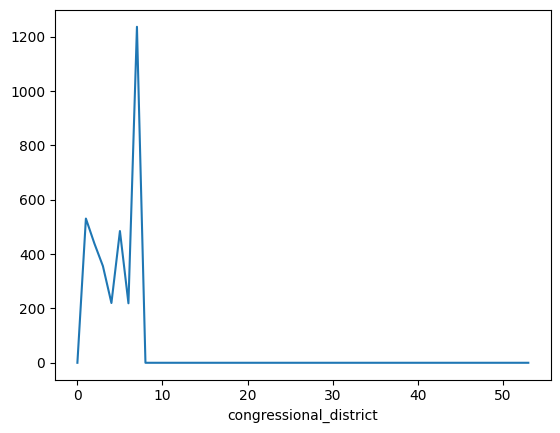

In [ ]:
congressional_district_grouped_df['Alabama'].plot()

### Age Group and Gender

Adult 18+     128697
Teen 12-17     10966
Child 0-11      2175
Name: participant_age_group1, dtype: int64


<Axes: xlabel='participant_age_group1', ylabel='count'>

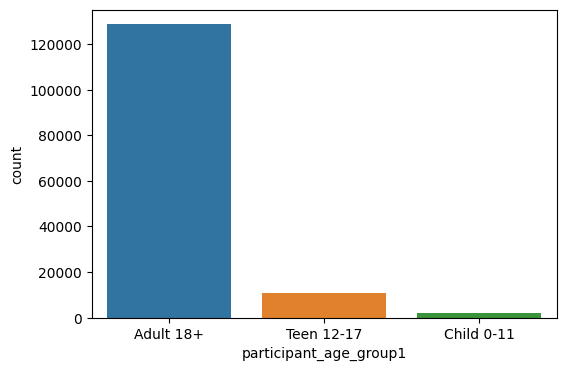

In [ ]:
%matplotlib inline
plt.figure(figsize=(6, 4))
age_group_count = df_incidents['participant_age_group1'].value_counts()
print(age_group_count)
sn.countplot(data=df_incidents, x='participant_age_group1')

In [ ]:
df_incidents['participant_gender1'].value_counts()

Male      127632
Female     18698
Name: participant_gender1, dtype: int64

In [ ]:
df_incidents = df_incidents[df_incidents['participant_gender1'] != 'Male, female']

Male      127632
Female     18698
Name: participant_gender1, dtype: int64


<Axes: xlabel='participant_gender1', ylabel='count'>

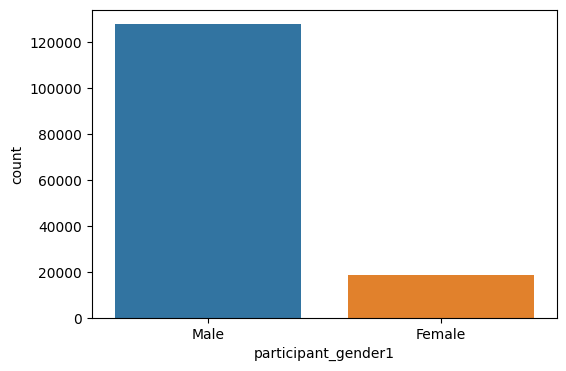

In [ ]:
%matplotlib inline
plt.figure(figsize=(6, 4))
age_group_count = df_incidents['participant_gender1'].value_counts()
print(age_group_count)
sn.countplot(data=df_incidents, x='participant_gender1')

### Other String Fields

In [ ]:
string_cols_to_check = ['city_or_county', 'address', 'participant_age_group1', 'participant_gender1', 'notes', 'incident_characteristics1', 'incident_characteristics2']

In [ ]:
for col in string_cols_to_check:
  values = df_incidents[col].unique()
  numerical_values = [val for val in values if not isinstance(val, str)]
  print(f"Column {col} has values: {numerical_values}")

Column city_or_county has values: []
Column address has values: [nan]
Column participant_age_group1 has values: [nan]
Column participant_gender1 has values: [nan]
Column notes has values: [nan]
Column incident_characteristics1 has values: [nan]
Column incident_characteristics2 has values: [nan]


# Attributes Distribution Visualization and Outliers Detection

### date

In [ ]:
df_incidents['datetime'].min(), df_incidents['datetime'].max()  # Hence a total of 63 months (2013-2017 included and three months from 2018)

(Timestamp('2013-01-01 00:00:00'), Timestamp('2018-03-31 00:00:00'))

<Axes: ylabel='Frequency'>

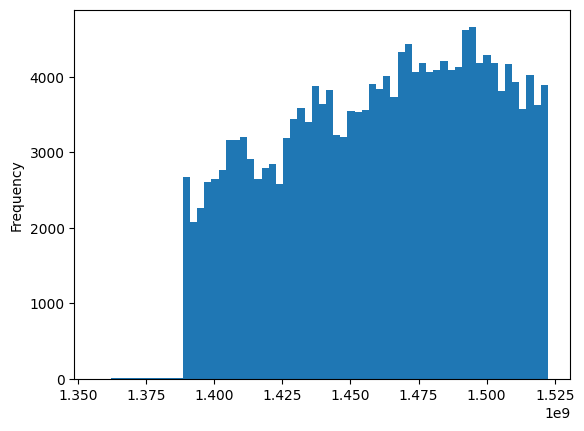

In [ ]:
df_incidents['datetime'].apply(lambda x: x.timestamp()).plot(kind='hist', bins=63)

### n_participants

In [ ]:
df_incidents['n_participants'].value_counts()

1.0     85793
2.0     48647
0.0     24863
3.0     14380
4.0      5392
5.0      2123
6.0       712
7.0       239
8.0       135
9.0        53
10.0       33
11.0       16
12.0       11
15.0        8
13.0        7
19.0        4
16.0        3
14.0        3
17.0        3
35.0        2
20.0        2
18.0        1
21.0        1
32.0        1
52.0        1
27.0        1
26.0        1
22.0        1
24.0        1
63.0        1
Name: n_participants, dtype: int64

We can safely remove by hand all records with values $> 10$.

In [ ]:
df_backup = df_incidents.copy()

In [ ]:
len(df_incidents[df_incidents['n_participants'] == 0])

24863

In [ ]:
len(df_incidents[df_incidents['n_participants'].isnull()])

0

In [ ]:
df_incidents = df_incidents[(df_incidents['n_participants'] <= 10)]
len(df_incidents)

182370

<Axes: xlabel='n_participants', ylabel='count'>

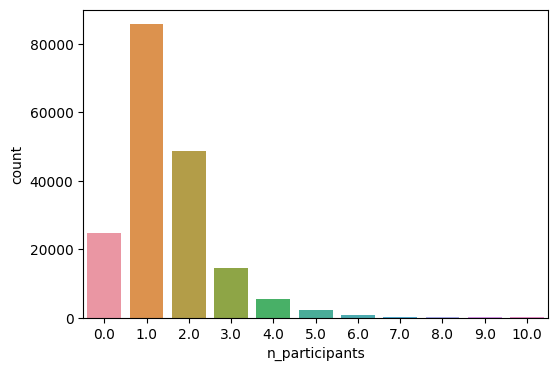

In [ ]:
plt.figure(figsize=(6, 4))
sn.countplot(data=df_incidents, x='n_participants')

### min_age_participants



In [ ]:
df_incidents['min_age_participants'].value_counts().keys()

Float64Index([    19.0,     18.0,     21.0,     20.0,     22.0,     23.0,
                  24.0,     25.0,     17.0,     26.0,
              ...
              141997.0, 585916.0, 563423.0, 231950.0, 495868.0, 644418.0,
              672434.0, 598185.0, 739624.0, 872260.0],
             dtype='float64', length=2765)

In [ ]:
len(df_incidents[df_incidents['min_age_participants'] > 80])

2942

In [ ]:
df_incidents = df_incidents[df_incidents['min_age_participants'].isnull() | (df_incidents['min_age_participants'] <= 80)]
len(df_incidents)

179428

<Axes: ylabel='Frequency'>

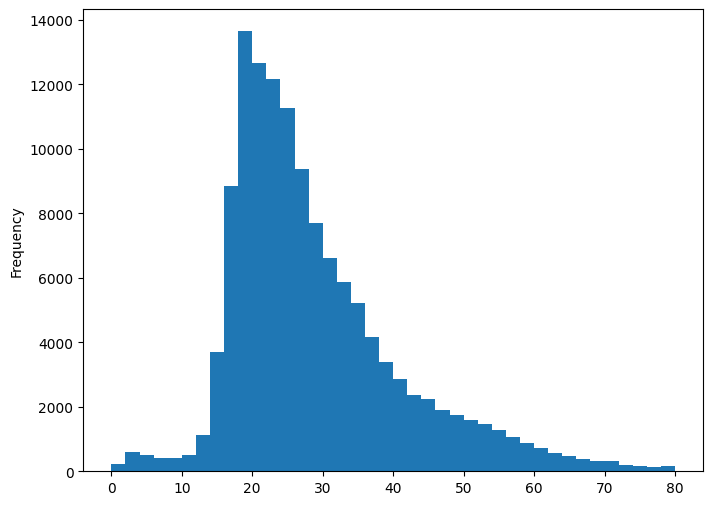

In [ ]:
plt.figure(figsize=(8, 6))
df_incidents['min_age_participants'].plot(kind='hist', bins=40)
#sn.countplot(data=df_incidents, x='min_age_participants')

### avg_age_participants



In [ ]:
df_incidents['avg_age_participants'].value_counts().keys()

Float64Index([    22.0,     24.0,     20.0,     18.0,     26.0,     23.0,
                  19.0,     28.0,     21.0,     25.0,
              ...
              315780.0, 583186.0, 661203.0, 327431.0, 448966.0, 194702.0,
              763315.0, 327888.0, 538576.0, 777647.0],
             dtype='float64', length=2032)

In [ ]:
len(df_incidents[df_incidents['avg_age_participants'] > 80])

1971

In [ ]:
df_incidents = df_incidents[df_incidents['avg_age_participants'].isnull() | (df_incidents['avg_age_participants'] <= 80)]
len(df_incidents)

177457

<Axes: ylabel='Frequency'>

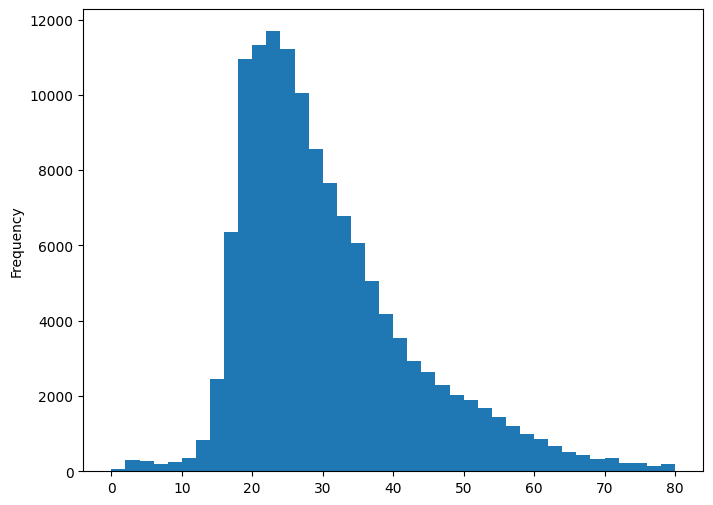

In [ ]:
plt.figure(figsize=(8, 6))
df_incidents['avg_age_participants'].plot(kind='hist', bins=40)
#sn.countplot(data=df_incidents, x='avg_age_participants')

### max_age_participants



In [ ]:
df_incidents['max_age_participants'].value_counts().keys()

Float64Index([    24.0,     23.0,     22.0,     19.0,     20.0,     21.0,
                  25.0,     26.0,     18.0,     27.0,
              ...
              272239.0, 158525.0, 427514.0, 250051.0, 413860.0, 331782.0,
              869687.0, 599162.0, 859332.0, 461985.0],
             dtype='float64', length=1399)

In [ ]:
len(df_incidents[df_incidents['max_age_participants'] > 80])

1584

In [ ]:
df_incidents = df_incidents[df_incidents['max_age_participants'].isnull() | (df_incidents['max_age_participants'] <= 80)]
len(df_incidents)

175873

<Axes: ylabel='Frequency'>

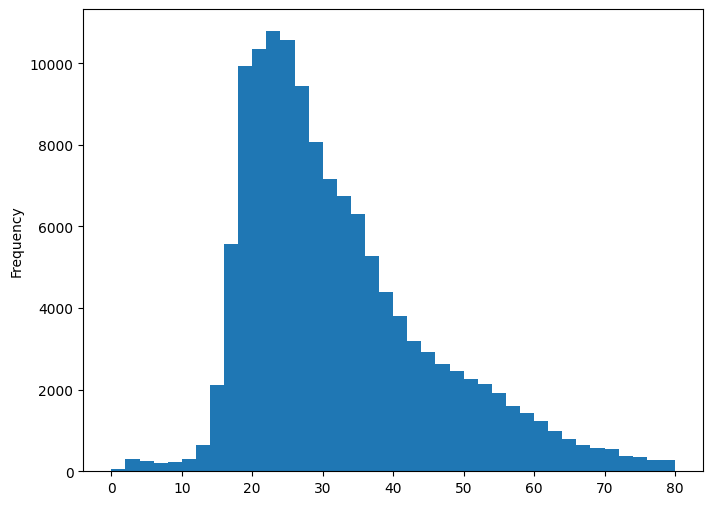

In [ ]:
plt.figure(figsize=(8, 6))
df_incidents['max_age_participants'].plot(kind='hist', bins=40)
#sn.countplot(data=df_incidents, x='max_age_participants')

### n_killed

In [ ]:
df_incidents['n_killed'].value_counts()

0    132076
1     39452
2      3693
3       488
4       113
5        37
6         7
8         4
7         2
9         1
Name: n_killed, dtype: int64

In [ ]:
df_backup = df_incidents.copy()

In [ ]:
df_incidents = df_incidents[df_incidents['n_killed'] < 6]
len(df_incidents)

175859

<Axes: xlabel='n_killed', ylabel='count'>

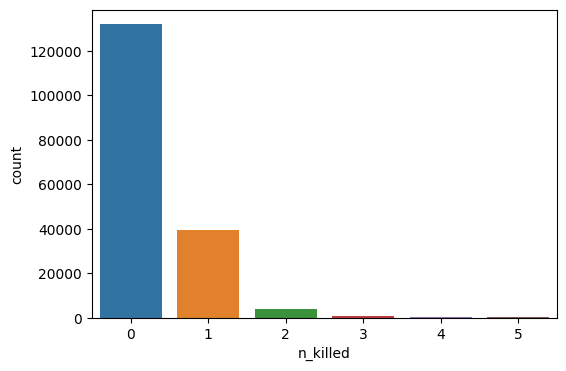

In [ ]:
plt.figure(figsize=(6, 4))
sn.countplot(data=df_incidents, x='n_killed')

### n_injured

In [ ]:
df_incidents['n_injured'].value_counts()

0    113237
1     53169
2      7275
3      1544
4       437
5       129
6        45
7        16
8         4
9         3
Name: n_injured, dtype: int64

In [ ]:
df_backup = df_incidents.copy()

In [ ]:
df_incidents = df_incidents[df_incidents['n_injured'] < 7]
len(df_incidents)

175836

<Axes: xlabel='n_injured', ylabel='count'>

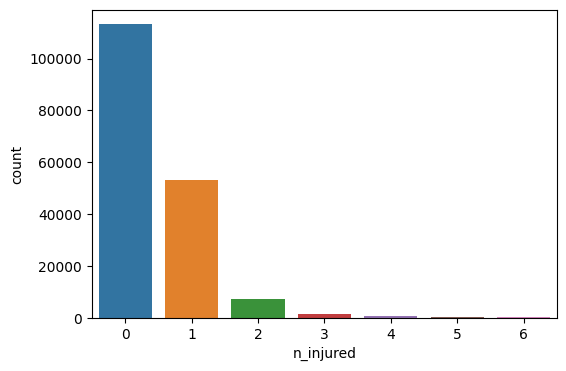

In [ ]:
plt.figure(figsize=(6, 4))
sn.countplot(data=df_incidents, x='n_injured')

### n_arrested

In [ ]:
df_incidents['n_arrested'].value_counts()

0.0     87648
1.0     48117
2.0      8431
3.0      2675
4.0      1027
5.0       316
6.0        96
7.0        39
8.0        29
9.0        13
10.0       10
Name: n_arrested, dtype: int64

In [ ]:
df_backup = df_incidents.copy()

In [ ]:
df_incidents = df_backup.copy()

In [ ]:
df_incidents = df_incidents[df_incidents['n_arrested'].isnull() | (df_incidents['n_arrested'] < 7)]
len(df_incidents)

175745

<Axes: xlabel='n_arrested', ylabel='count'>

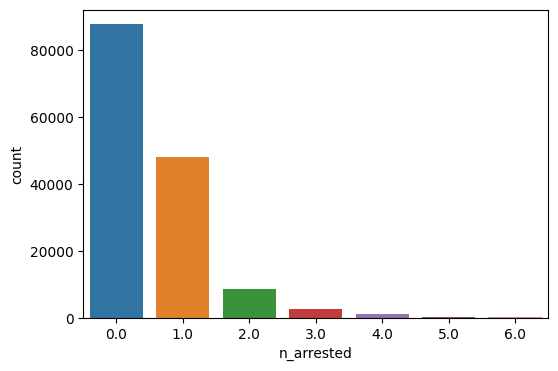

In [ ]:
plt.figure(figsize=(6, 4))
sn.countplot(data=df_incidents, x='n_arrested')

### n_males

In [ ]:
df_incidents['n_males'].value_counts()

1.0     82006
2.0     36147
3.0     10202
0.0      6059
4.0      3573
5.0      1203
6.0       348
7.0        86
8.0        37
9.0         6
10.0        6
Name: n_males, dtype: int64

In [ ]:
df_backup = df_incidents.copy()

In [ ]:
df_incidents = df_incidents[(df_incidents['n_males'] < 9) | df_incidents['n_males'].isnull()]
len(df_incidents)

175733

<Axes: xlabel='n_males', ylabel='count'>

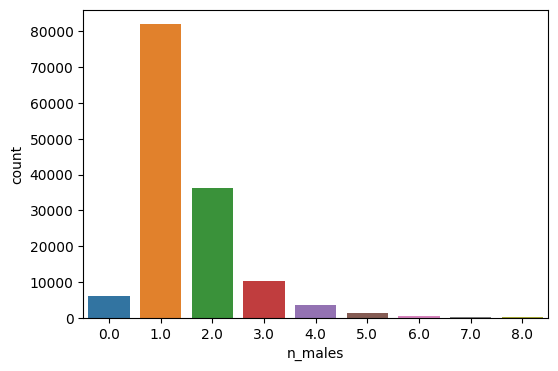

In [ ]:
plt.figure(figsize=(6, 4))
sn.countplot(data=df_incidents, x='n_males')

### n_females

In [ ]:
df_incidents['n_females'].value_counts()

0.0    113241
1.0     23401
2.0      2569
3.0       372
4.0        63
5.0        13
6.0         2
Name: n_females, dtype: int64

In [ ]:
df_backup = df_incidents.copy()

In [ ]:
df_incidents = df_incidents[df_incidents['n_females'].isnull() | (df_incidents['n_females'] < 5)]

In [ ]:
len(df_incidents)

175718

<Axes: xlabel='n_females', ylabel='count'>

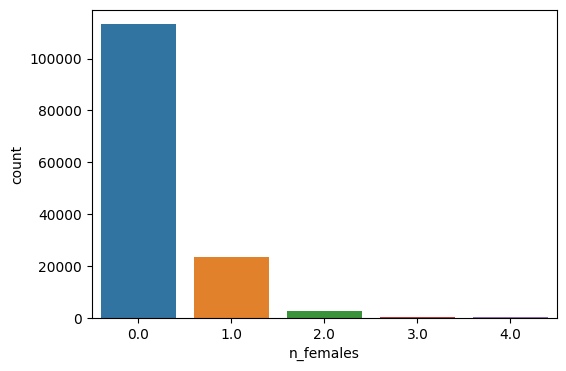

In [ ]:
plt.figure(figsize=(6, 4))
sn.countplot(data=df_incidents, x='n_females')

### n_males / n_participants

In [ ]:
df_incidents['males_ratio'] = df_incidents['n_males'] / df_incidents['n_participants']

In [ ]:
df_incidents['males_ratio'].value_counts()

1.000000    113241
0.500000     12699
0.000000      6056
0.666667      3885
0.750000      1423
0.333333       907
0.800000       587
0.600000       269
0.833333       189
0.250000       113
0.400000        94
0.857143        45
0.714286        42
0.200000        30
0.571429        19
0.875000        17
0.625000        13
0.428571         6
0.888889         6
0.555556         3
0.777778         2
Name: males_ratio, dtype: int64

Now let's see how many incidents have more than half participants as males:

In [ ]:
more_males_df = df_incidents[df_incidents['males_ratio'] > 0.5]
print(len(more_males_df), f"{100*len(more_males_df)/len(df_incidents):.4f}% of total")

119741 68.1438% of total


<Axes: ylabel='Frequency'>

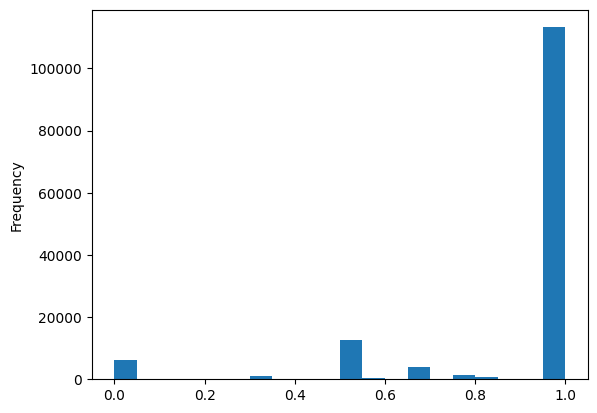

In [ ]:
%matplotlib inline
df_incidents['males_ratio'].plot(kind='hist', bins=20)

### n_females / n_participants

In [ ]:
df_incidents['females_ratio'] = df_incidents['n_females'] / df_incidents['n_participants']

In [ ]:
df_incidents['females_ratio'].value_counts()

0.000000    113241
0.500000     12699
1.000000      6056
0.333333      3885
0.250000      1423
0.666667       907
0.200000       587
0.400000       269
0.166667       189
0.750000       113
0.600000        94
0.142857        45
0.285714        42
0.800000        30
0.428571        19
0.125000        17
0.375000        13
0.571429         6
0.111111         6
0.444444         3
0.222222         2
Name: females_ratio, dtype: int64

Now let's see how many incidents have more than half participants as females:

In [ ]:
more_females_df = df_incidents[df_incidents['females_ratio'] > 0.5]
print(len(more_females_df), f"{100*len(more_females_df)/len(df_incidents):.4f}% of total")

7206 4.1009% of total


<Axes: ylabel='Frequency'>

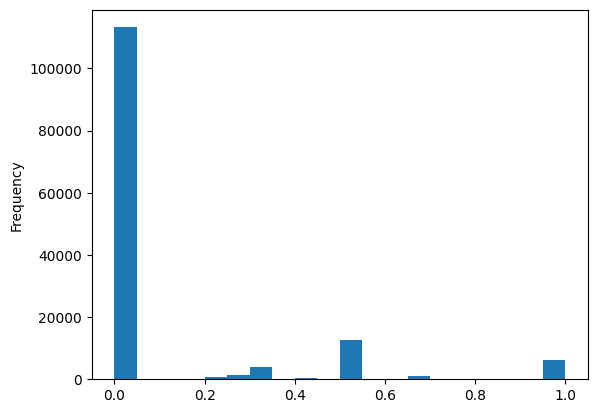

In [ ]:
%matplotlib inline
df_incidents['females_ratio'].plot(kind='hist', bins=20)

We can also drop the fields `participant_age1`, `participant_age_group1`, `participant_gender1` because their information is *exact* **ONLY** when there is **1** participant, but we already know age, age group and gender from `min_age_participants`, `n_males`, `n_females`.

# Other Data Visualization

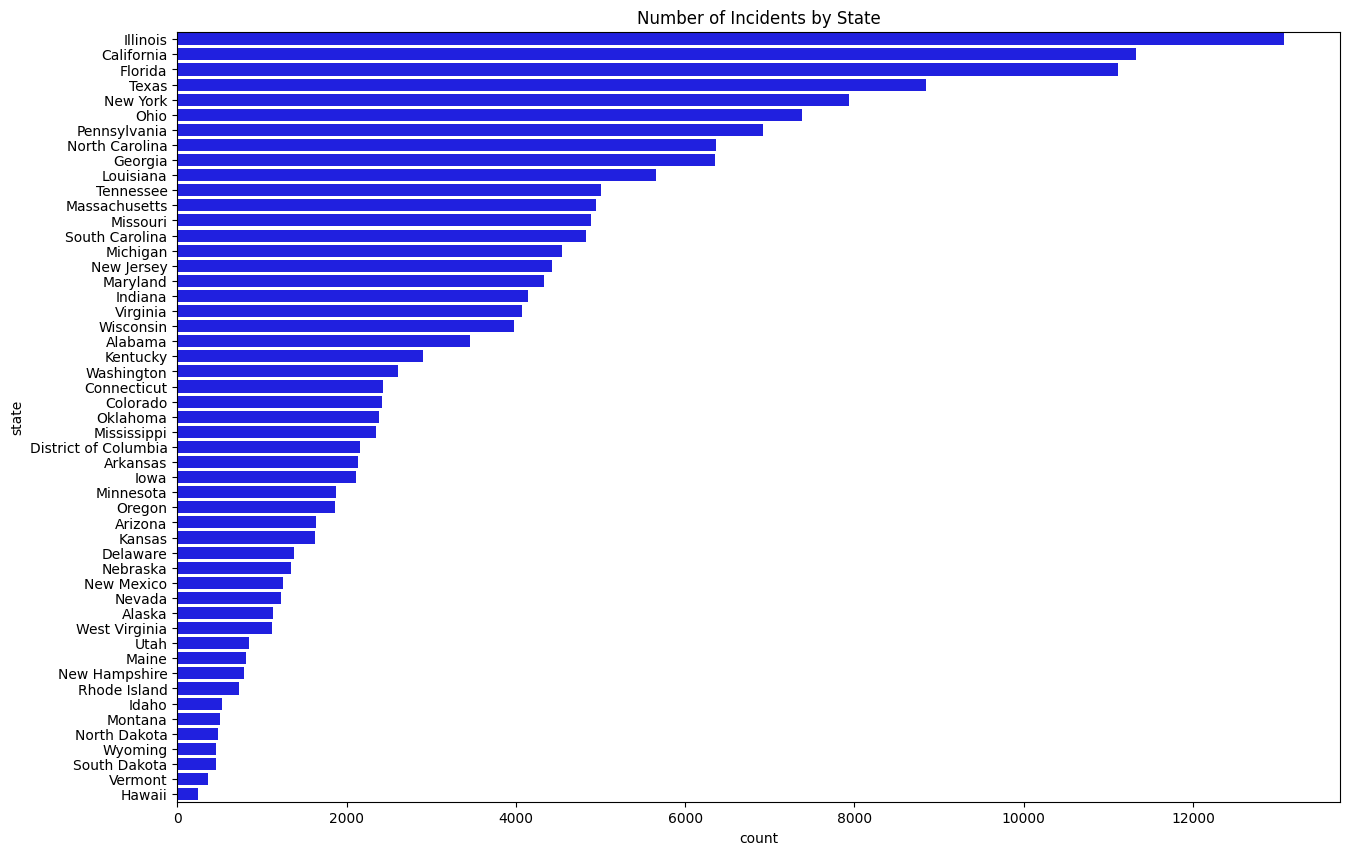

In [ ]:
# Bar plot for the number of incidents by state:
# This will show which states have the highest number of incidents.
plt.figure(figsize=(15,10))
sn.countplot(data=df_incidents, y='state', color='blue', order=df_incidents['state'].value_counts().index)
plt.title('Number of Incidents by State')
plt.show()

TODO: Possible indicators
* #incidents_by_state / state_population (2020);
* #killed_by_state / #incidents_by_state;
* n_males / n_participants;
* n_females / n_participants.

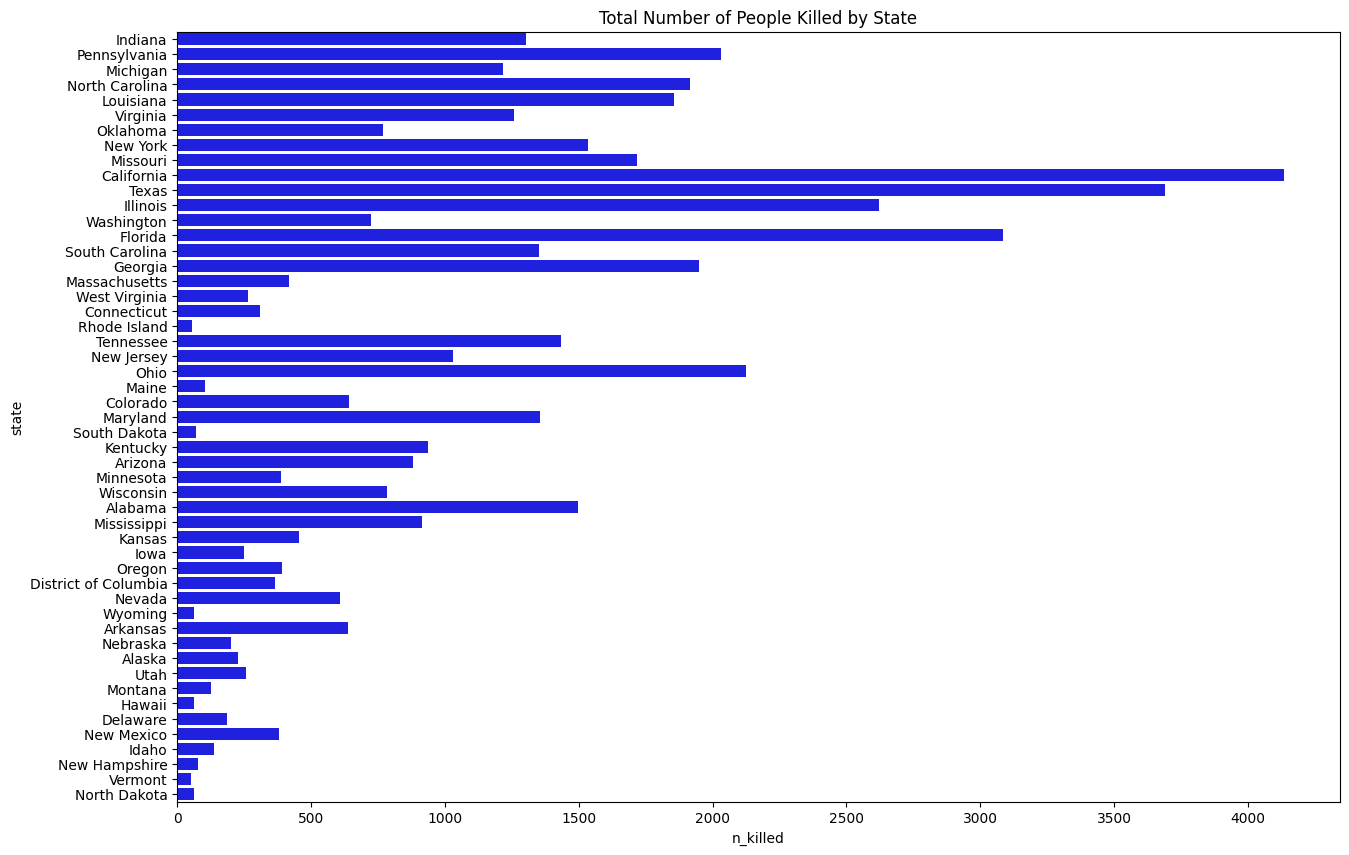

In [ ]:
#Bar plot for number of people killed by state

plt.figure(figsize=(15,10))
sn.barplot(data=df_incidents, y='state', x='n_killed', color='blue', estimator=sum, errorbar=None)
plt.title('Total Number of People Killed by State')
plt.show()


In [ ]:
# Checking for invalid states
valid_states = [
    'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware',
    'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky',
    'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
    'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
    'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island',
    'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
    'West Virginia', 'Wisconsin', 'Wyoming', 'District of Columbia'
]

#Added District of Columbia to the valid states even though it not a real state but it is valid

df_incidents['is_valid_state'] = df_incidents['state'].isin(valid_states)
invalid_states = df_incidents[~df_incidents['is_valid_state']]
print(f"Number of records with invalid states: {len(invalid_states)}")

Number of records with invalid states: 0


In [ ]:
df_incidents.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175718 entries, 0 to 239674
Data columns (total 36 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   date                       175718 non-null  object        
 1   state                      175718 non-null  object        
 2   city_or_county             175718 non-null  object        
 3   address                    163366 non-null  object        
 4   latitude                   169449 non-null  float64       
 5   longitude                  169449 non-null  float64       
 6   congressional_district     166248 non-null  float64       
 7   state_house_district       146151 non-null  float64       
 8   state_senate_district      150909 non-null  float64       
 9   participant_age1           128862 non-null  float64       
 10  participant_age_group1     135152 non-null  object        
 11  participant_gender1        139646 non-null  object  

In [ ]:
df_incidents['avg_age_participants'] = df_incidents['avg_age_participants'].astype(float)

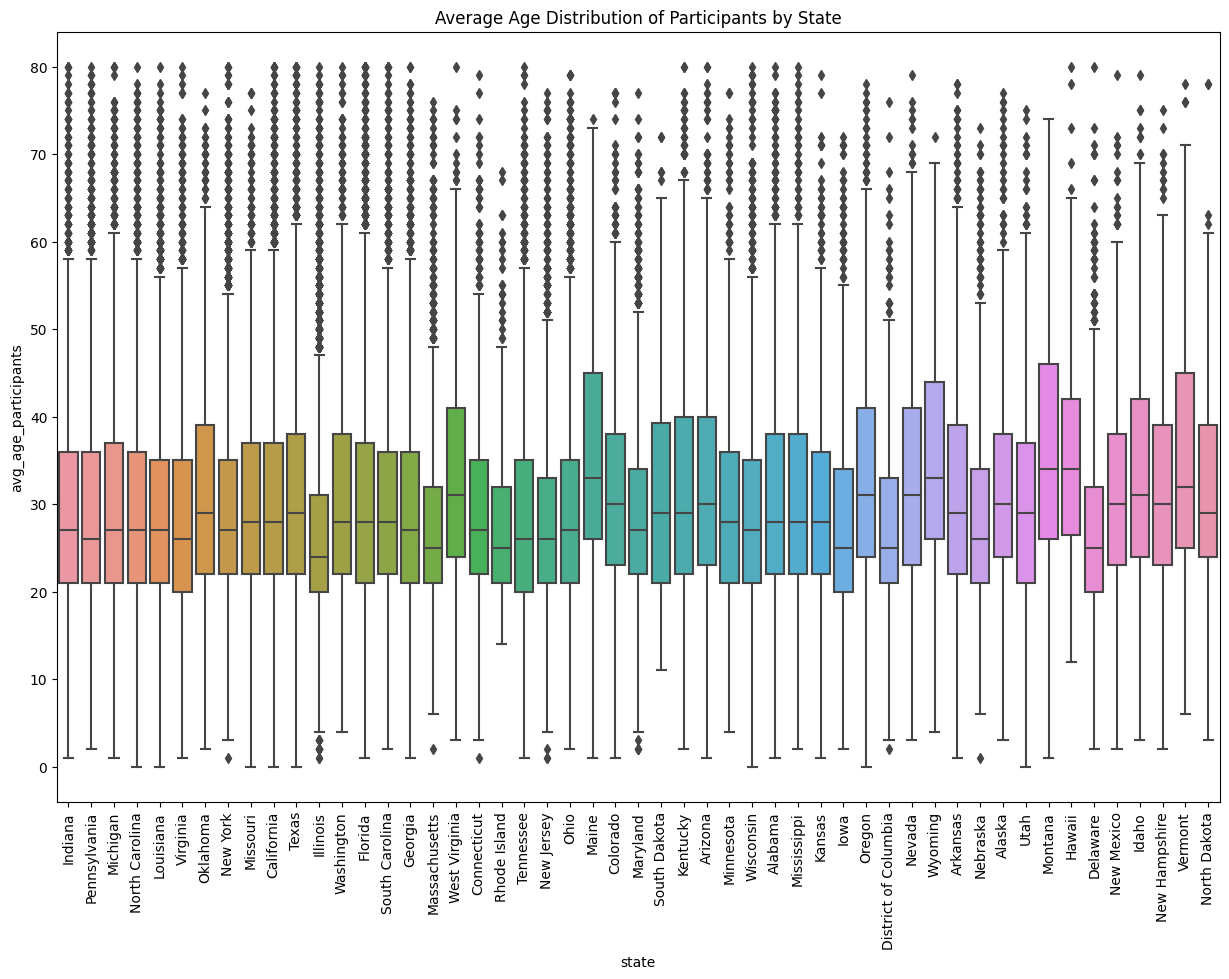

In [ ]:
# Box plot for age distributions by state:
# This can give an idea about the age distribution of participants involved in incidents for each state.

plt.figure(figsize=(15,10))
sn.boxplot(data=df_incidents, x='state', y='avg_age_participants')
plt.xticks(rotation=90)
plt.title('Average Age Distribution of Participants by State')
plt.show()

In [ ]:
# Check for gender consistency
invalid_genders = df_incidents[~df_incidents['participant_gender1'].isin(['Male', 'Female'])]
print(f"Invalid genders:\n{invalid_genders['participant_gender1'].unique()}")

Invalid genders:
[nan]


In [ ]:
##Check for non-negative values for number fields
number_fields = ['n_killed', 'n_injured', 'n_arrested', 'n_unharmed', 'n_participants']
for field in number_fields:
    if df_incidents[df_incidents[field] < 0].shape[0] > 0:
        print(f"Negative values found in {field}")

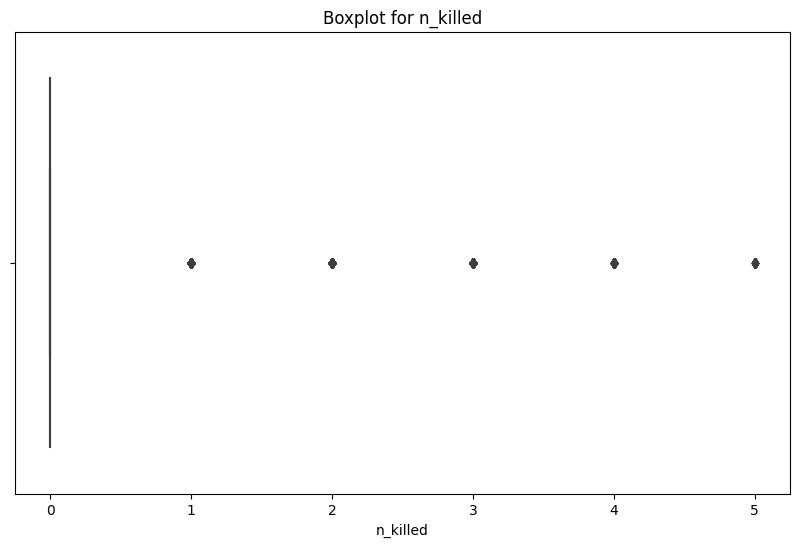

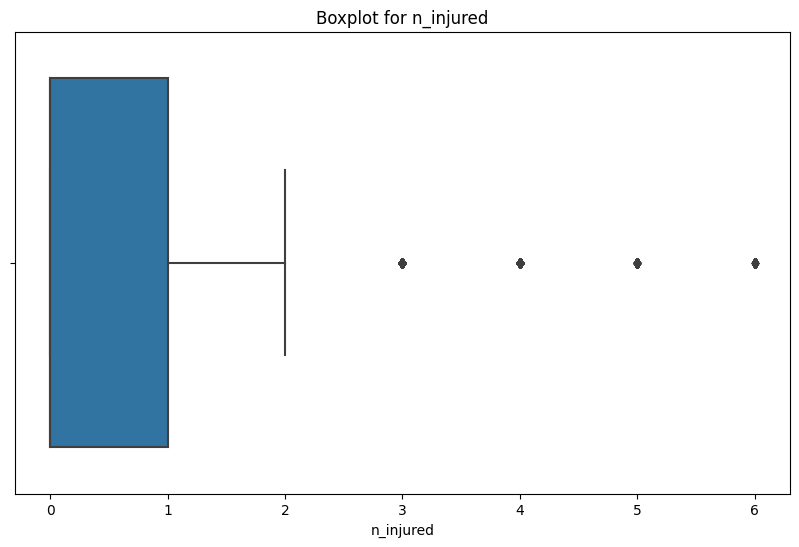

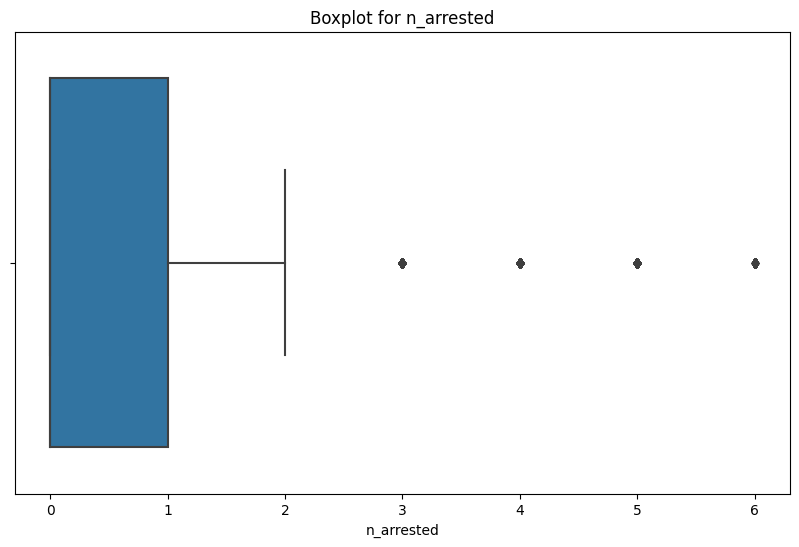

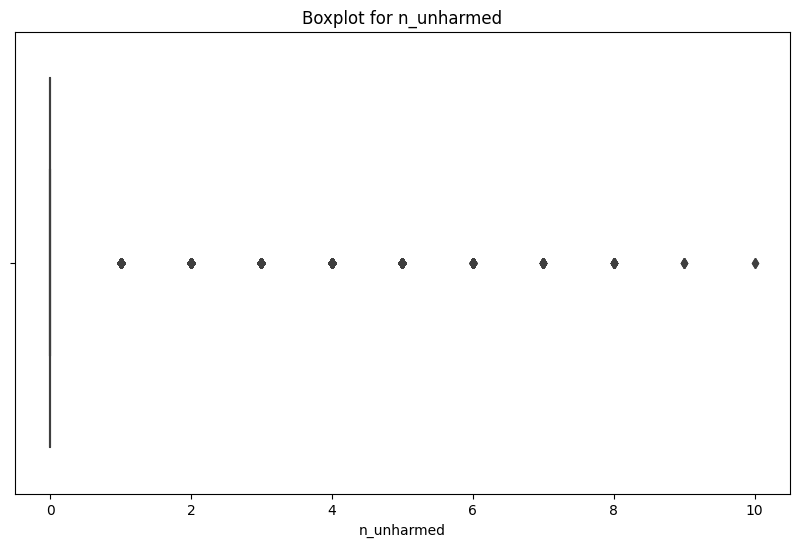

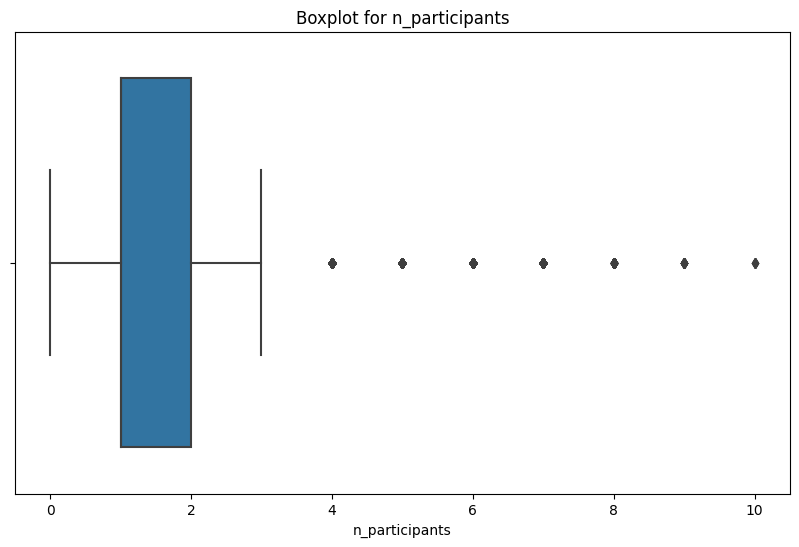

In [ ]:
# 2. Find outliers
## a. Boxplots are a great way to visualize outliers
for field in number_fields:
    plt.figure(figsize=(10,6))
    sn.boxplot(x=df_incidents[field])
    plt.title(f"Boxplot for {field}")
    plt.show()

In [ ]:
# 3. Detect and examine missing values & potential default values
## a. Check for missing values
missing_values = df_incidents.isnull().sum()
print(f"Missing values:\n{missing_values}")

Missing values:
date                             0
state                            0
city_or_county                   0
address                      12352
latitude                      6269
longitude                     6269
congressional_district        9470
state_house_district         29567
state_senate_district        24809
participant_age1             46856
participant_age_group1       40566
participant_gender1          36072
min_age_participants         46855
avg_age_participants         46856
max_age_participants         46856
n_participants_child         40566
n_participants_teen          40566
n_participants_adult         40566
n_males                      36072
n_females                    36072
n_killed                         0
n_injured                        0
n_arrested                   27435
n_unharmed                   27435
n_participants                   0
notes                        59509
incident_characteristics1      225
incident_characteristics2    71959
date

In [ ]:
## b. Check for default or placeholder values (e.g. 9999 or -1)
for field in number_fields:
    suspicious_values = df_incidents[df_incidents[field] == 9999].shape[0] # replace 9999 with any suspicious value
    if suspicious_values:
        print(f"Suspicious values found in {field}")

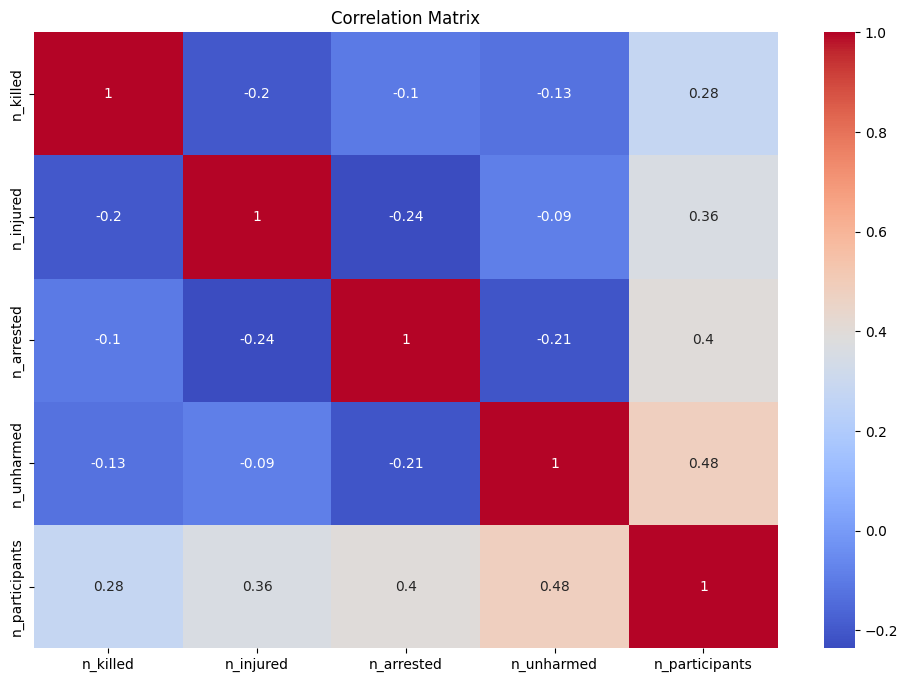

In [ ]:
# 4. Discover new or confirm expected dependencies or correlations between attributes
correlation_matrix = df_incidents[number_fields].corr()
plt.figure(figsize=(12,8))
sn.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

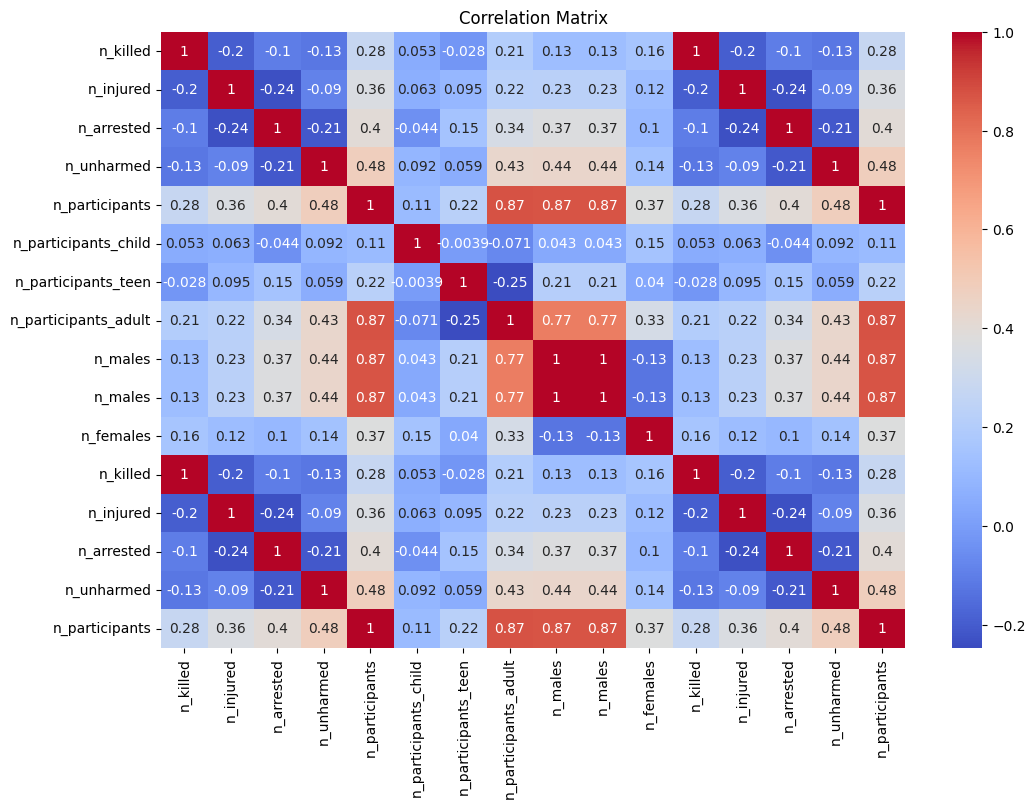

In [ ]:
number_fields = ['n_killed', 'n_injured', 'n_arrested', 'n_unharmed', 'n_participants', 'n_participants_child', 'n_participants_teen', 'n_participants_adult', 'n_males', 'n_males', 'n_females', 'n_killed', 'n_injured', 'n_arrested', 'n_unharmed', 'n_participants']

correlation_matrix = df_incidents[number_fields].corr()
plt.figure(figsize=(12,8))
sn.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

<Figure size 1000x600 with 0 Axes>

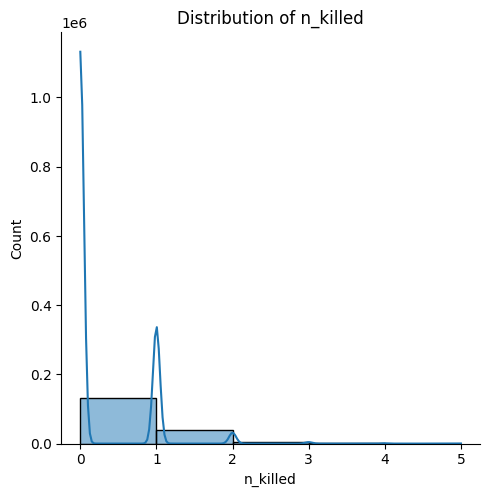

<Figure size 1000x600 with 0 Axes>

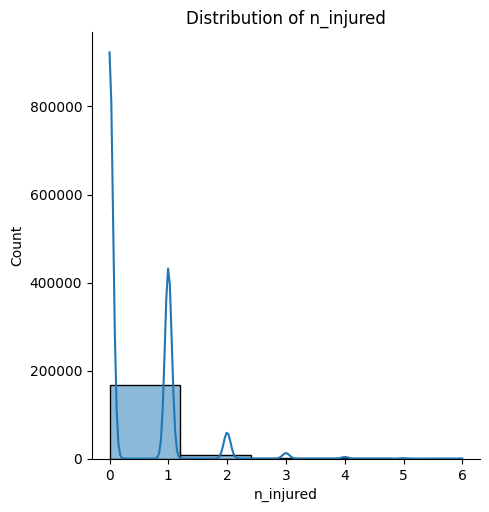

<Figure size 1000x600 with 0 Axes>

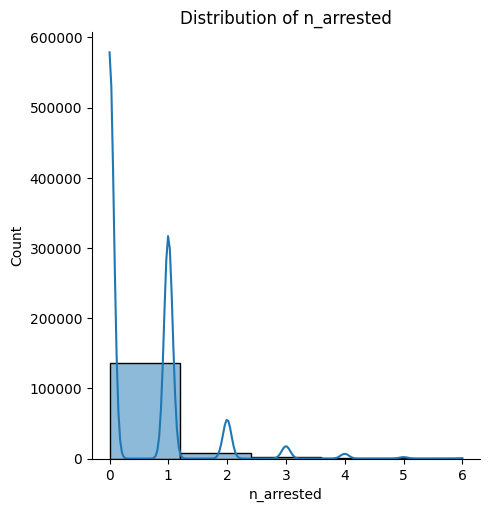

<Figure size 1000x600 with 0 Axes>

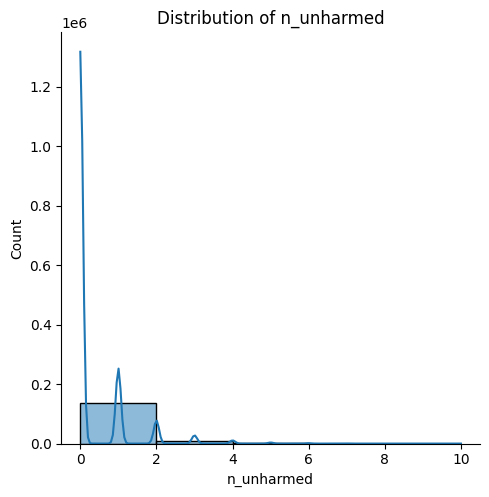

<Figure size 1000x600 with 0 Axes>

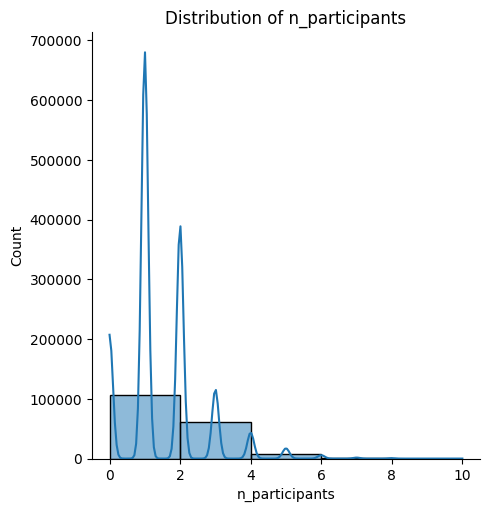

<Figure size 1000x600 with 0 Axes>

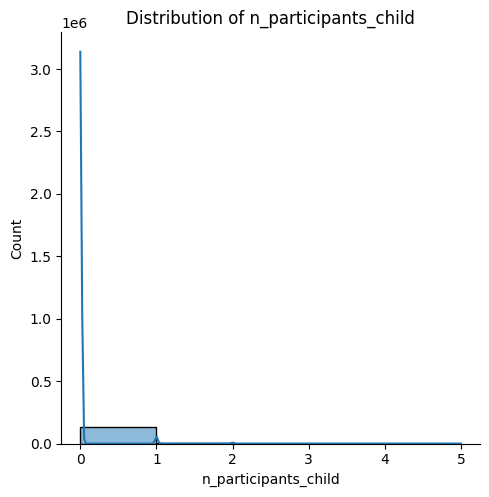

<Figure size 1000x600 with 0 Axes>

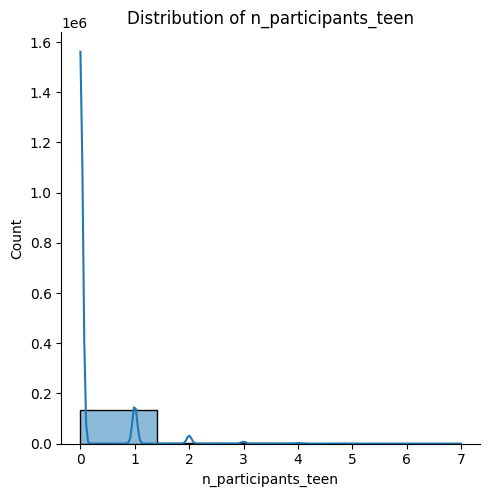

<Figure size 1000x600 with 0 Axes>

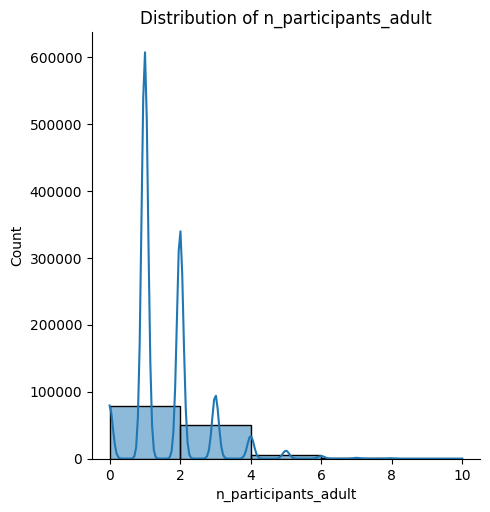

<Figure size 1000x600 with 0 Axes>

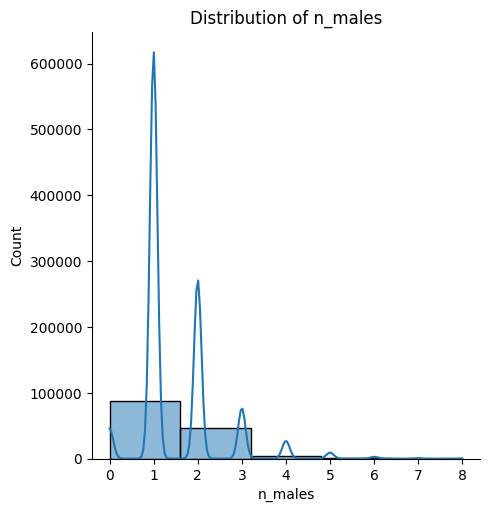

<Figure size 1000x600 with 0 Axes>

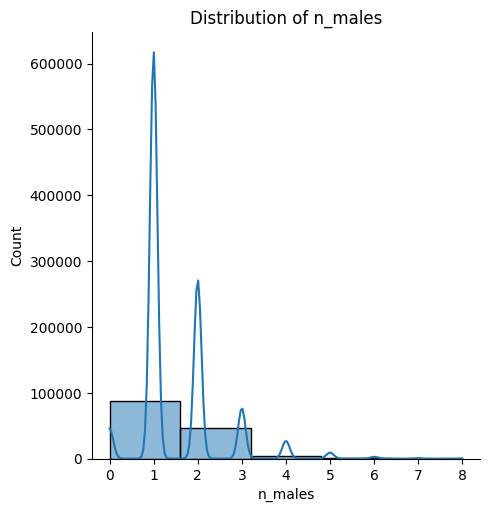

<Figure size 1000x600 with 0 Axes>

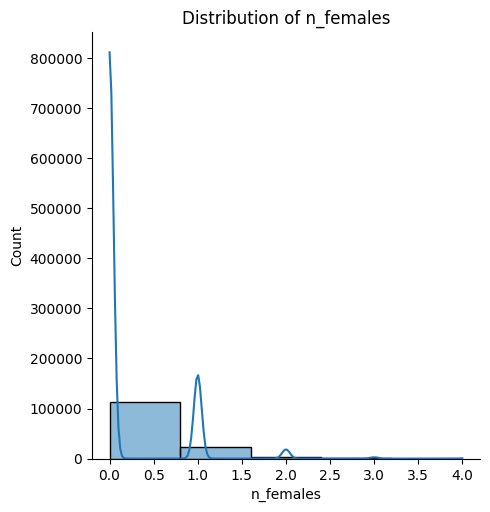

<Figure size 1000x600 with 0 Axes>

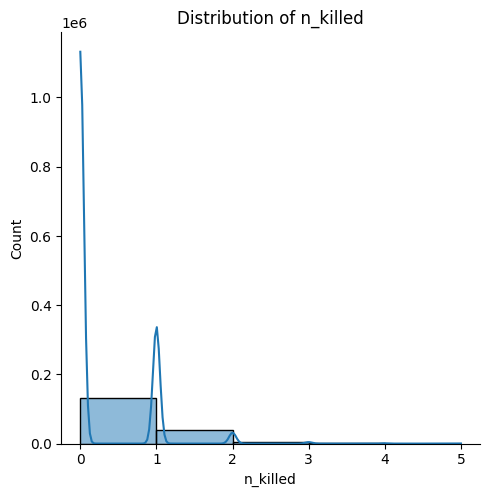

<Figure size 1000x600 with 0 Axes>

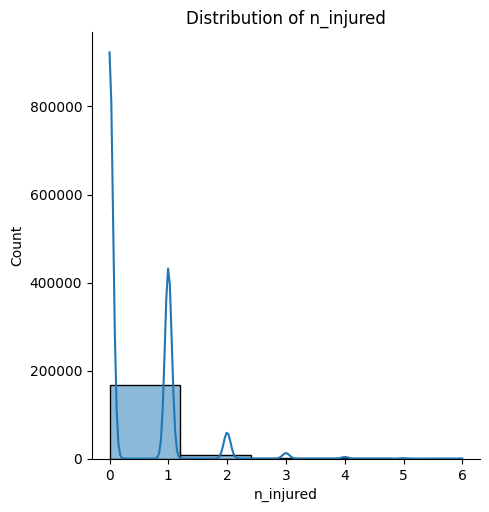

<Figure size 1000x600 with 0 Axes>

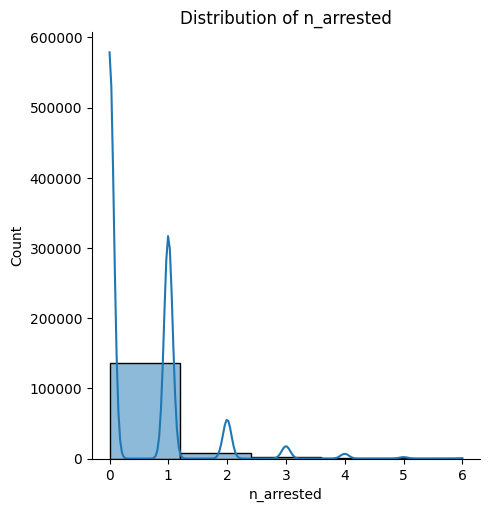

<Figure size 1000x600 with 0 Axes>

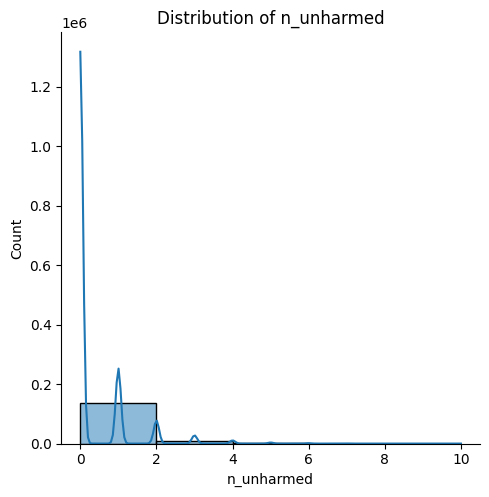

<Figure size 1000x600 with 0 Axes>

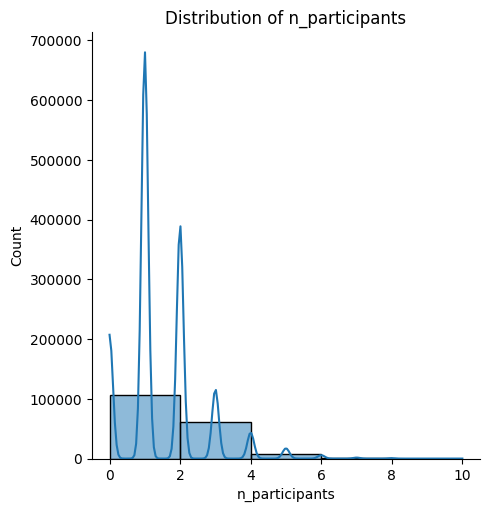

In [ ]:
# 5. Check specific application dependent assumptions (like normal distribution)
## a. Check for normal distribution
for field in number_fields:
    plt.figure(figsize=(10,6))
    sn.displot(df_incidents[field].dropna(), kde=True, bins=10)
    plt.title(f"Distribution of {field}")
    plt.show()

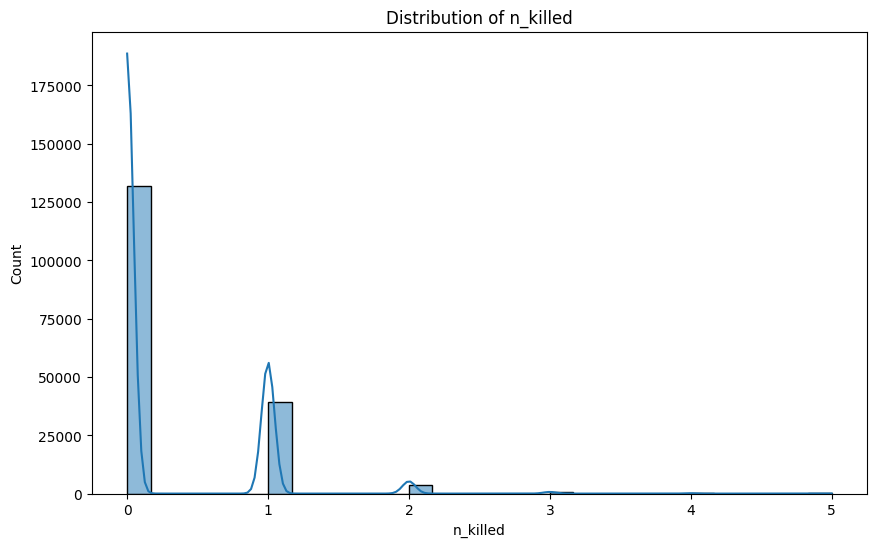

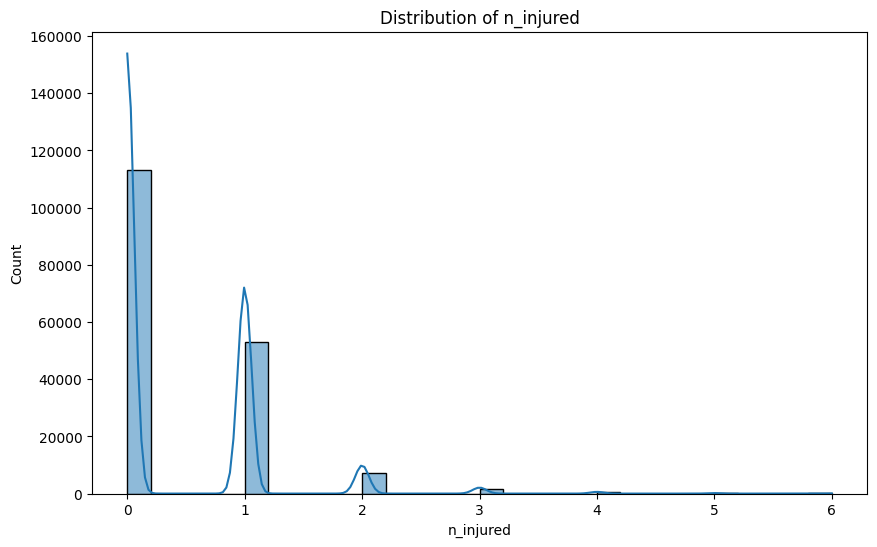

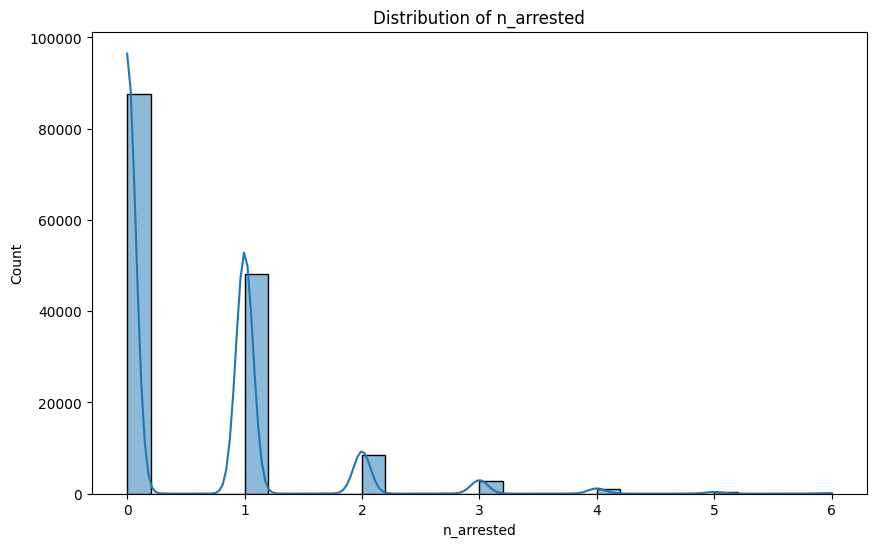

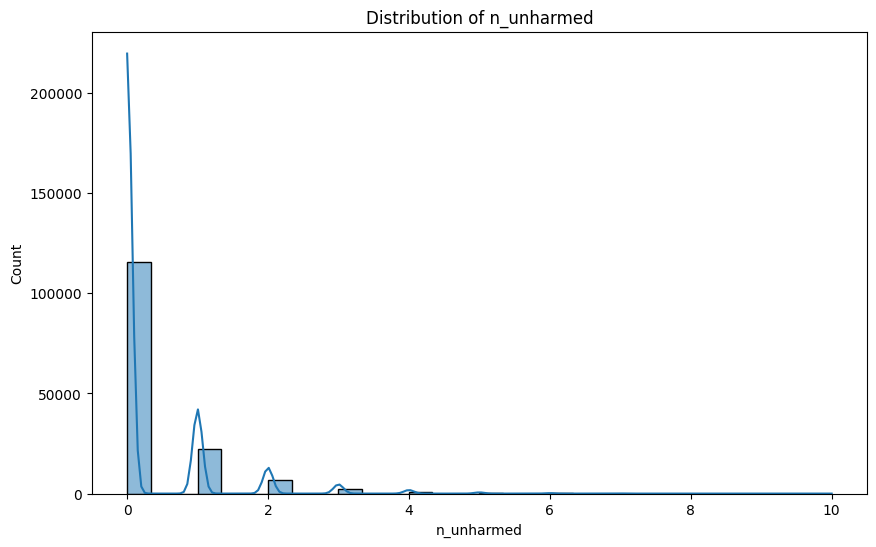

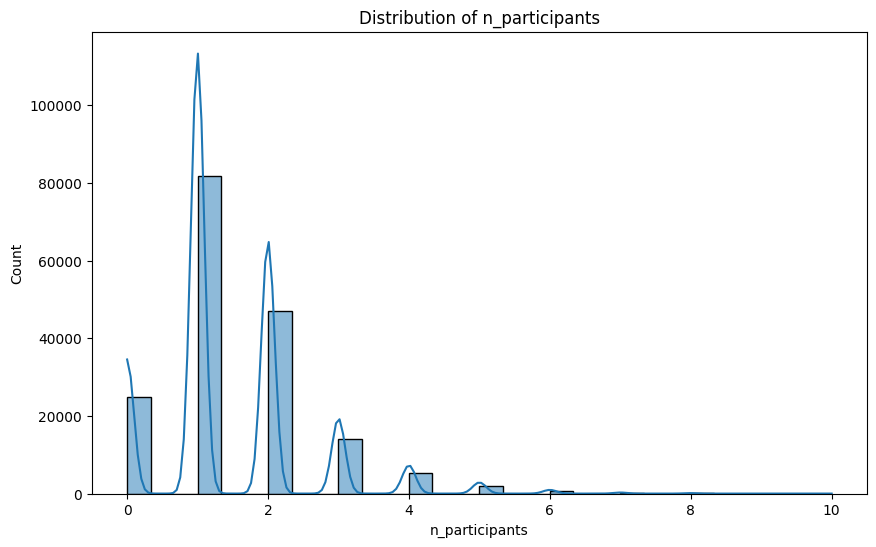

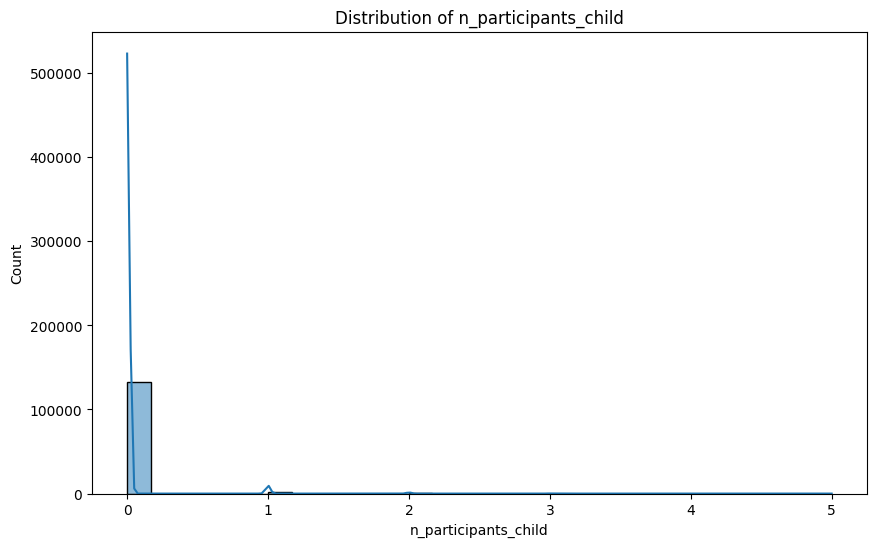

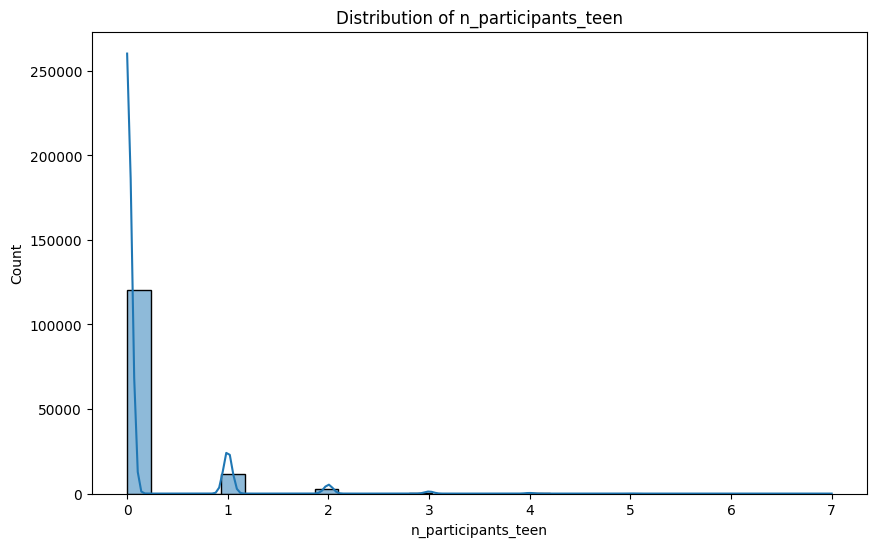

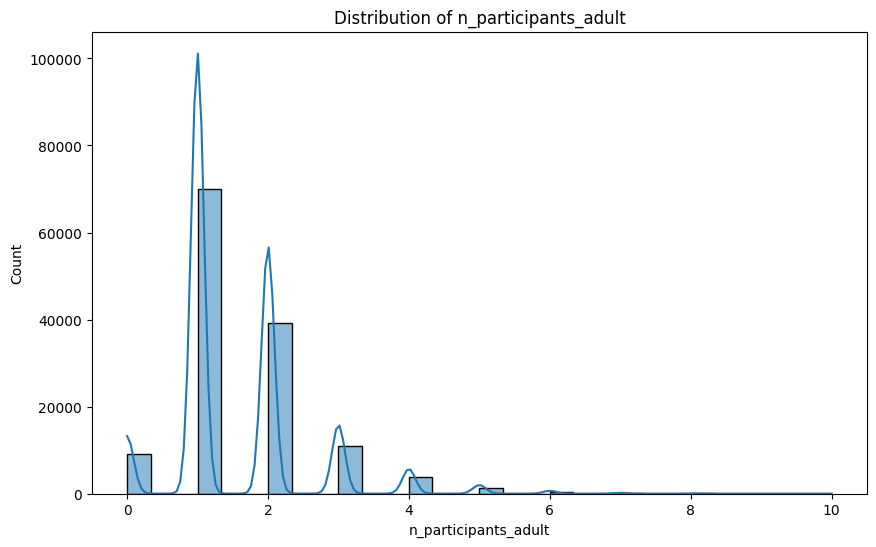

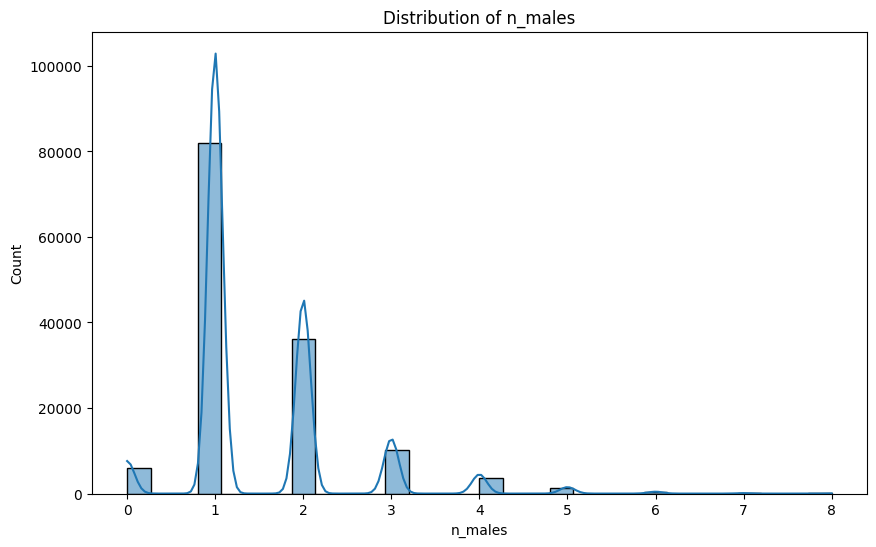

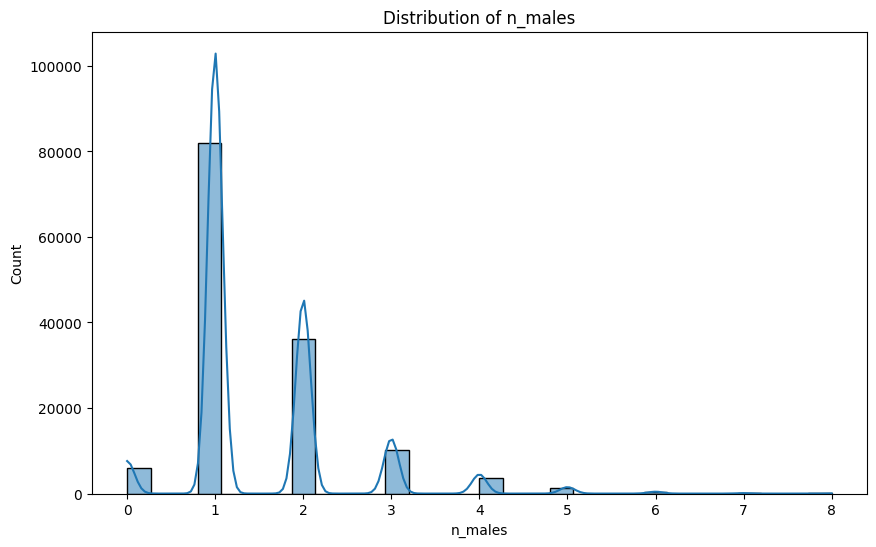

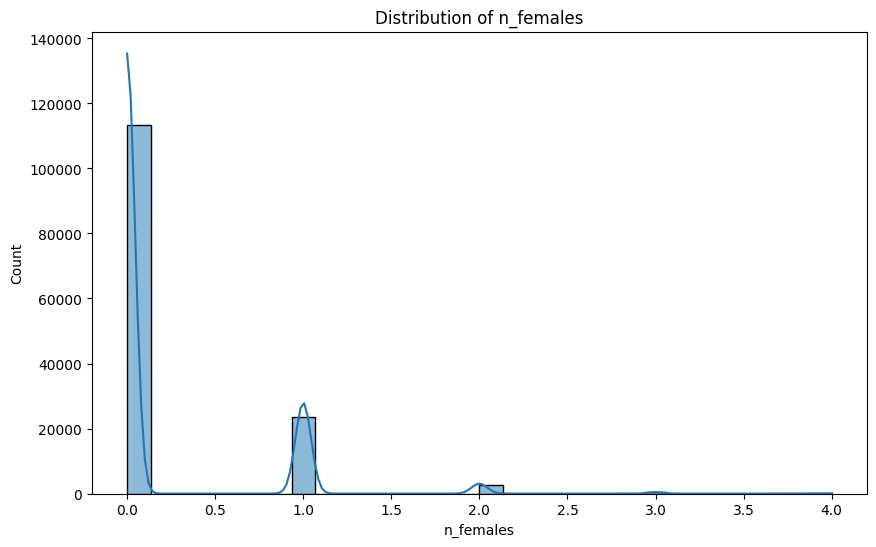

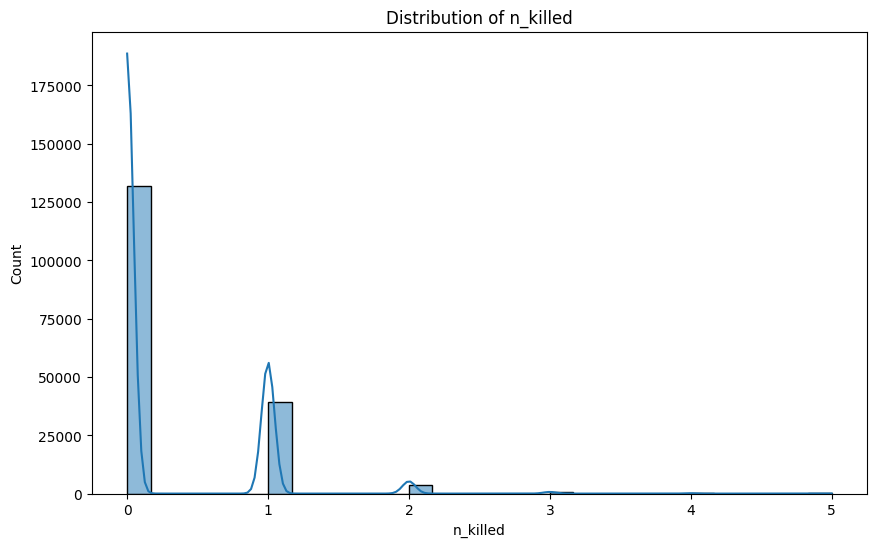

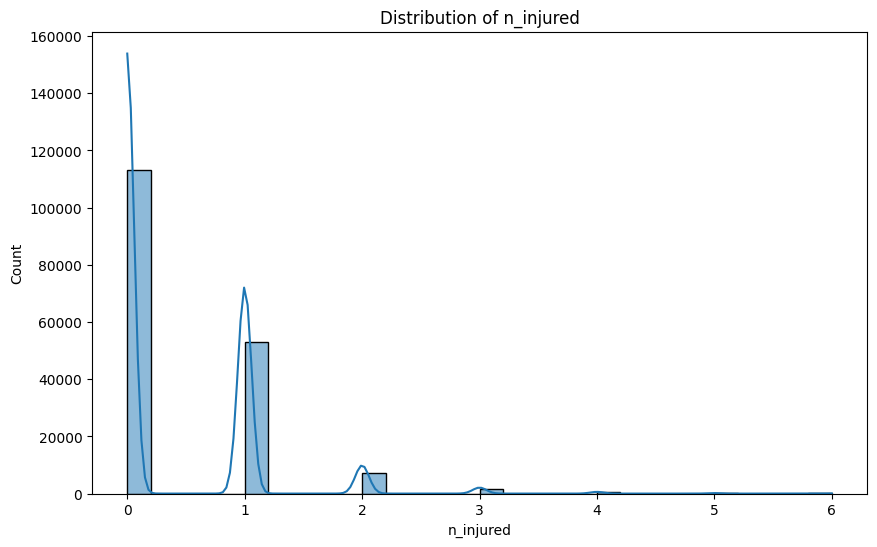

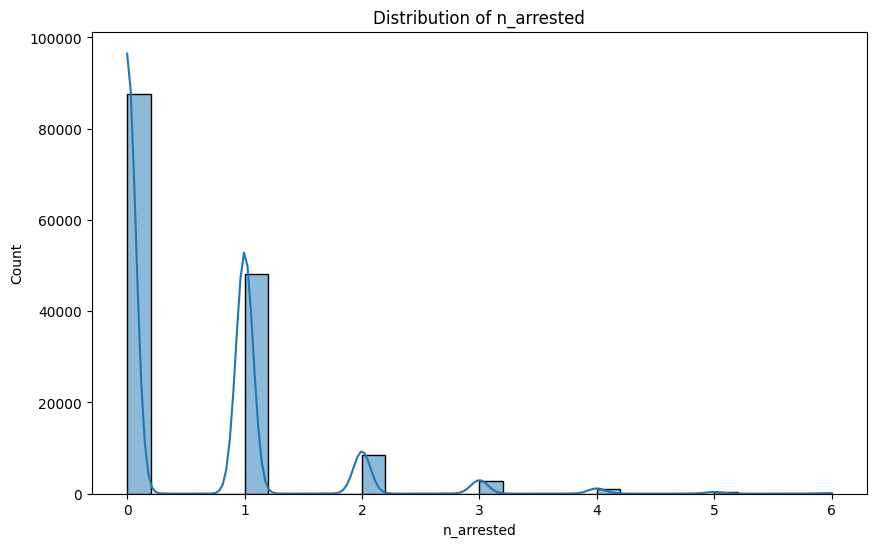

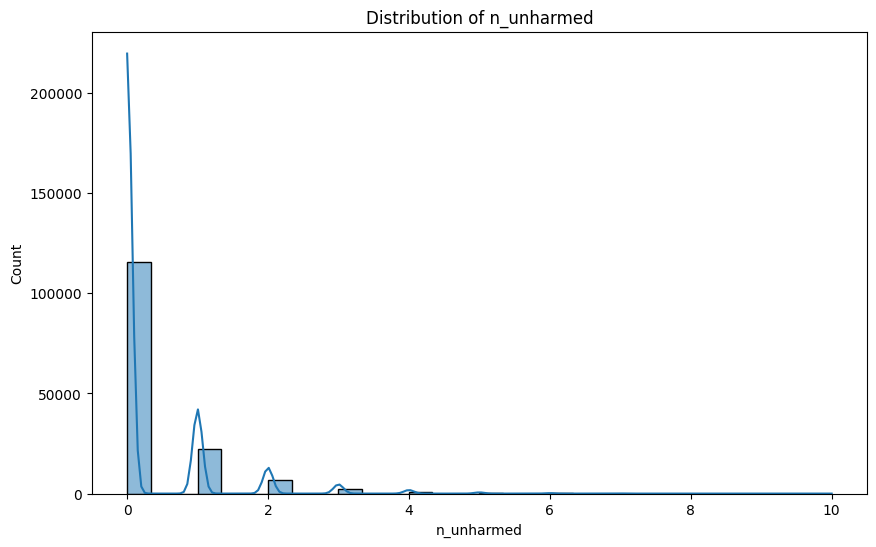

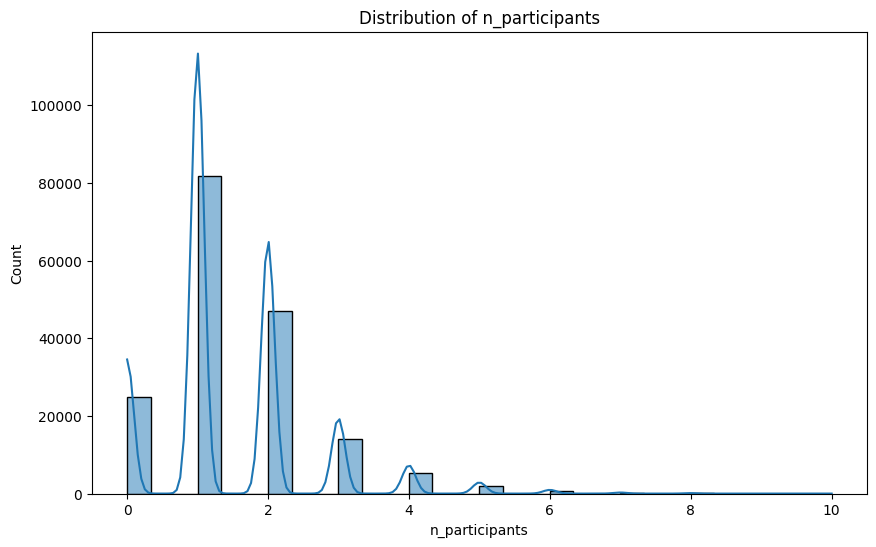

In [ ]:
for field in number_fields:
    plt.figure(figsize=(10,6))
    sn.histplot(df_incidents[field].dropna(), kde=True, bins=30)
    plt.title(f"Distribution of {field}")
    plt.show()

In [ ]:
actual_mean_n_killed = df_incidents['n_killed'].mean()
print(f"Mean number killed({actual_mean_n_killed})")

Mean number killed(0.2782412729487019)


In [ ]:
# 6. Compare statistics with expected behavior
## For this part, you need to have a priori expectations. For demonstration:
expected_mean_n_killed = 2  # This is just an example value
actual_mean_n_killed = df_incidents['n_killed'].mean()
print(f"Mean number killed({actual_mean_n_killed})")
if actual_mean_n_killed > expected_mean_n_killed:
    print(f"Actual mean of n_killed ({actual_mean_n_killed}) is greater than expected ({expected_mean_n_killed})")

Mean number killed(0.2782412729487019)


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


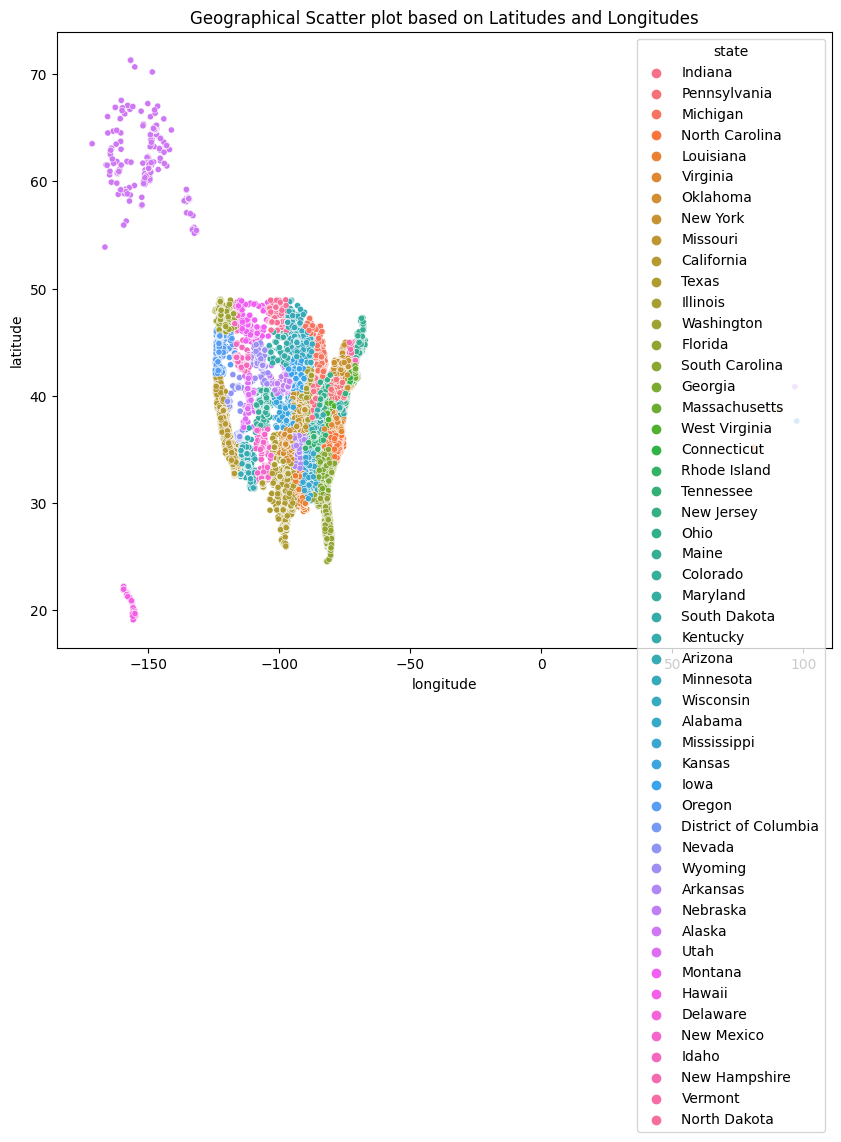

In [ ]:
# Addressing the latitude and longitude attributes to visualize data geographically
plt.figure(figsize=(10, 8))
sn.scatterplot(x=df_incidents['longitude'], y=df_incidents['latitude'], hue=df_incidents['state'], legend=True, s=20)
plt.title("Geographical Scatter plot based on Latitudes and Longitudes")
plt.show()

In [ ]:
df_incidents['date'] = pd.to_datetime(df_incidents['date'])
#Convert to DateTime type

In [ ]:
# Extract Year, Month, Day, and other components
df_incidents['year'] = df_incidents['date'].dt.year
df_incidents['month'] = df_incidents['date'].dt.month
df_incidents['day'] = df_incidents['date'].dt.day
df_incidents['weekday'] = df_incidents['date'].dt.weekday  # Where Monday is 0 and Sunday is 6



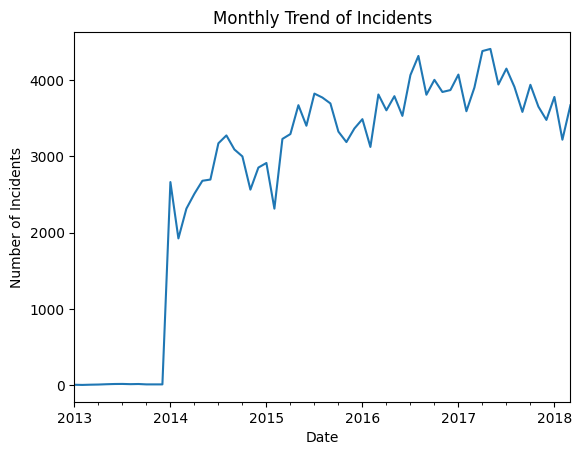

In [ ]:
#Time Series Analysis
monthly_incidents = df_incidents.resample('M', on='date').size()
monthly_incidents.plot()
plt.title('Monthly Trend of Incidents')
plt.xlabel('Date')
plt.ylabel('Number of Incidents')
plt.show()


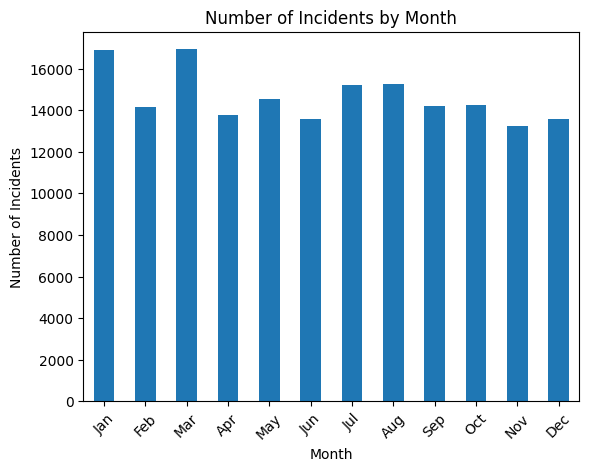

In [ ]:
#Seasonal analysis
#To see if there's a pattern during certain months

# Group by month and count the number of incidents
monthly_incidents = df_incidents.groupby(df_incidents['date'].dt.month).size()

# Plotting
monthly_incidents.plot(kind='bar')
plt.title('Number of Incidents by Month')
plt.xlabel('Month')
plt.ylabel('Number of Incidents')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.show()



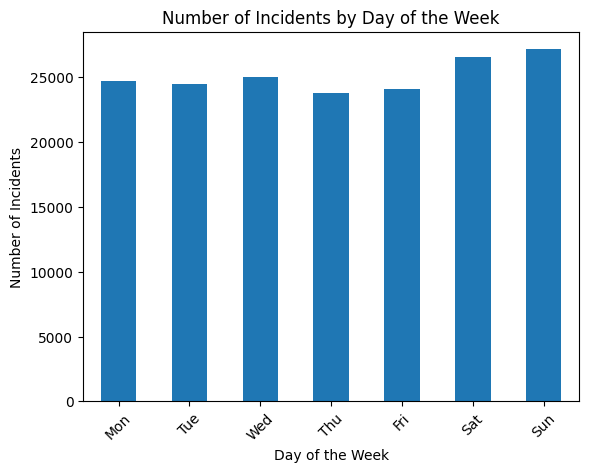

In [ ]:
# Day-of-week analysis
# To see if there's a pattern on certain days of the week

# Group by day of the week and count the number of incidents
# Note: By default, Monday=0 and Sunday=6
daily_incidents = df_incidents.groupby(df_incidents['date'].dt.dayofweek).size()

# Plotting
daily_incidents.plot(kind='bar')
plt.title('Number of Incidents by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Incidents')
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], rotation=45)
plt.show()


In [ ]:
# Ensure the 'date' column is in datetime format
df_incidents['date'] = pd.to_datetime(df_incidents['date'])

# Filter out rows with dates in the future
df_incidents = df_incidents[df_incidents['date'] <= pd.Timestamp.now()]

# Now, you can proceed with your further analysis


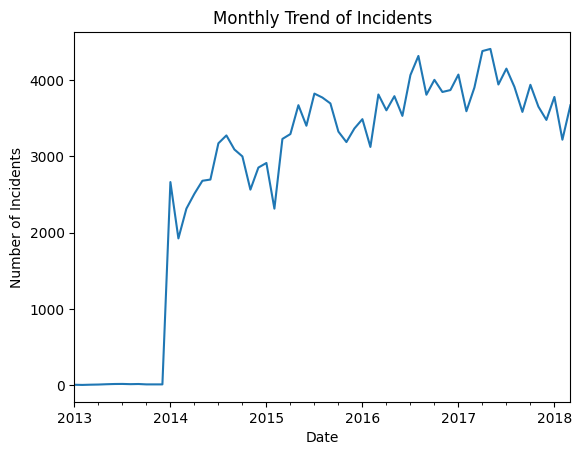

In [ ]:
#Time Series Analysis After Removing future Dates
monthly_incidents = df_incidents.resample('M', on='date').size()
monthly_incidents.plot()
plt.title('Monthly Trend of Incidents')
plt.xlabel('Date')
plt.ylabel('Number of Incidents')
plt.show()
